In [6]:
#Importing libraries to open data and run RFE + model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import sklearn
from scipy import stats
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from collections import defaultdict

In [2]:
#Import dataset for HCA --> raw values
dat_cls = pd.read_csv(r'240617-NTA-Norm-Paper2-HCA-Input-RAW.csv', header=0) #Non-targets: 92 samples X 602 features
#Convert to numpy
dat_cls_np = dat_cls.to_numpy()
target_1 = dat_cls_np[:,0] #Convert target variables to 2D-array for sci-kit learn
data_1 = dat_cls_np[:,1:]

In [3]:
#Z-scoring (mean zero, S.D. one; by column/feature) + printing to excel file
# Standardize the data_1 array
scaler = StandardScaler()
data_1_standardized = scaler.fit_transform(data_1)

# Combine the target column back with the standardized data
data_standardized_combined = np.hstack((target_1.reshape(-1, 1), data_1_standardized))

# Convert back to DataFrame for exporting
columns = dat_cls.columns
data_standardized_df = pd.DataFrame(data_standardized_combined, columns=columns)

# Save to an Excel file
data_standardized_df.to_excel('240617-standardized_data-HCA.xlsx', index=False)

print("Standardized dataset has been saved to 'standardized_data.xlsx'")

Standardized dataset has been saved to 'standardized_data.xlsx'


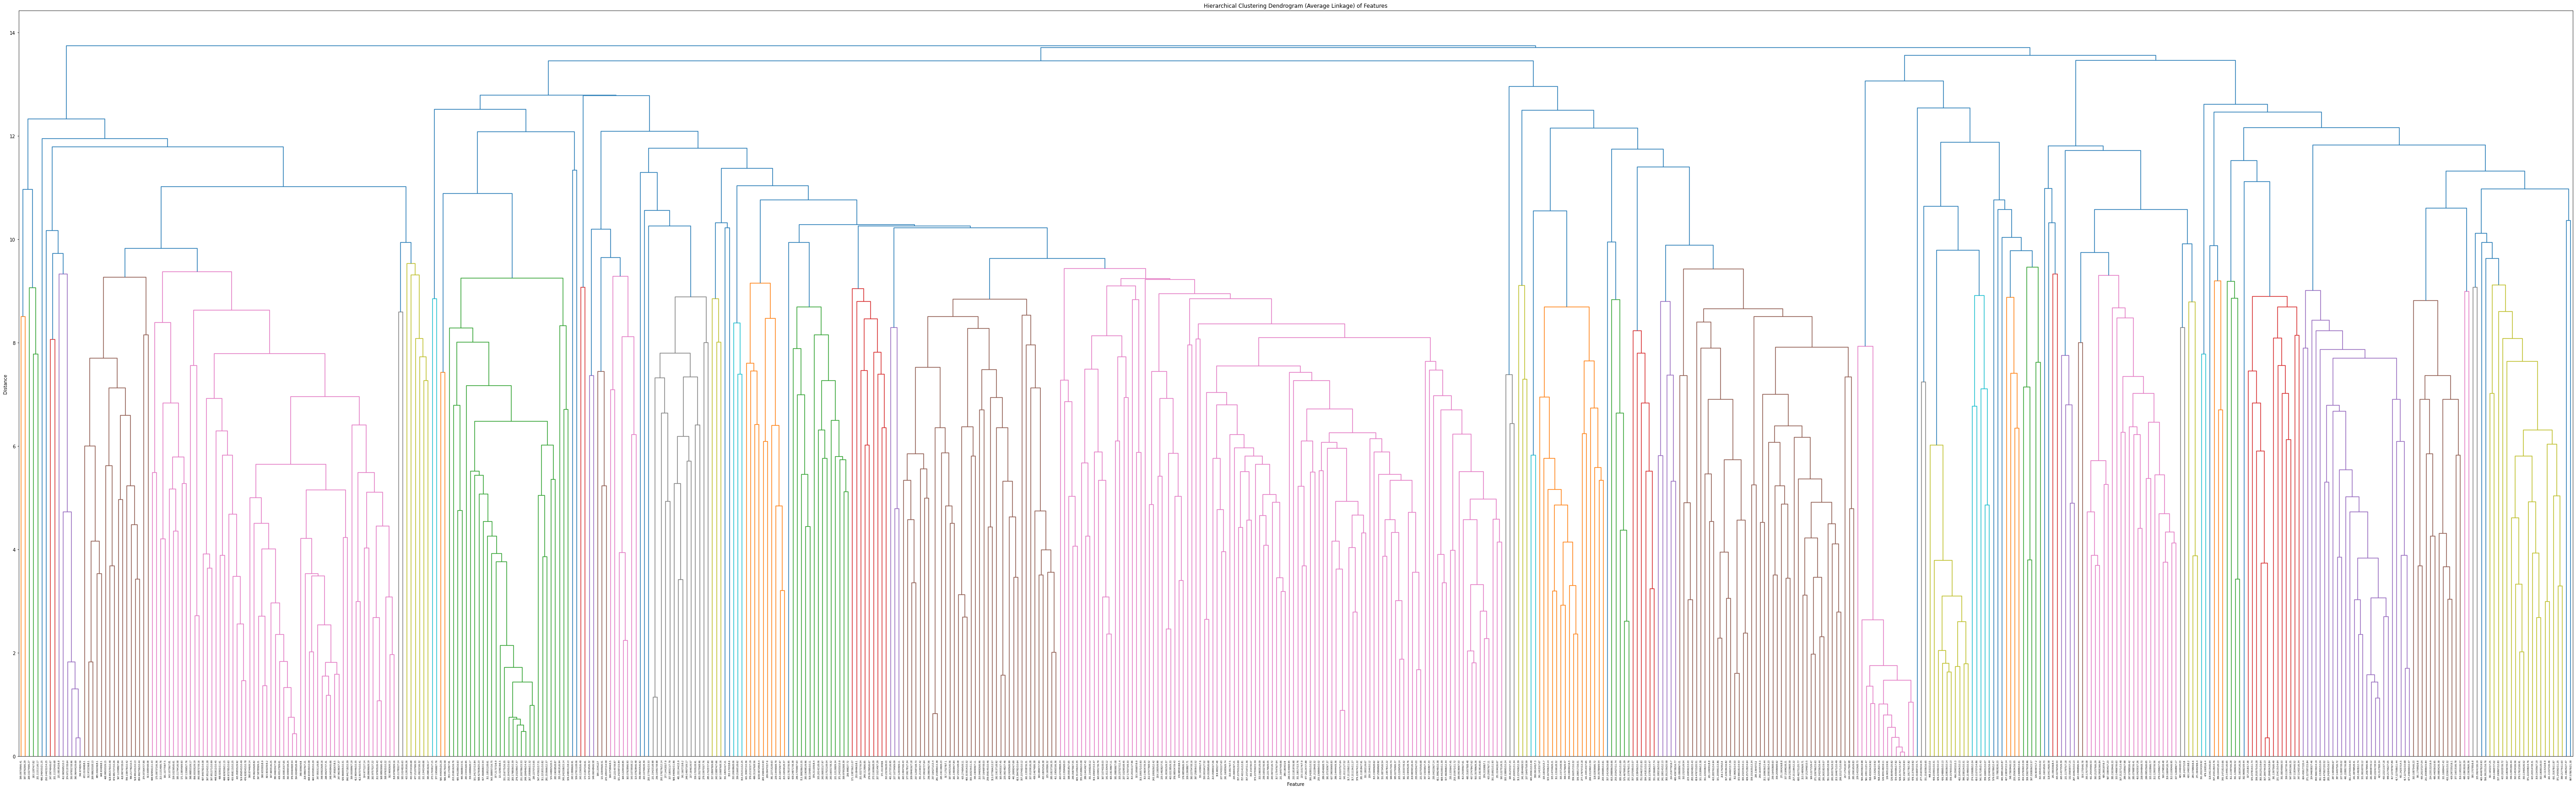

<Figure size 432x288 with 0 Axes>

In [4]:
# Transpose the data to cluster features instead of samples
data_1_standardized_transposed = data_1_standardized.T

# Perform hierarchical clustering using average linkage and Euclidean distance
linked = linkage(data_1_standardized_transposed, method='average', metric='euclidean')

# Plot the dendrogram with column labels
plt.figure(figsize=(100, 30))
dendrogram(linked,
           labels=dat_cls.columns[1:],  # Label the features
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True)

plt.title('Hierarchical Clustering Dendrogram (Average Linkage) of Features')
plt.xlabel('Feature')
plt.ylabel('Distance')
plt.xticks(rotation=90)
plt.show()

# Save the figure to a JPG file
plt.savefig('240617-Histogram-FULL-Cluster-Z-SCORE-AVG-EUC.png', dpi = 1500, bbox_inches='tight')
plt.show()

error: argument out of range

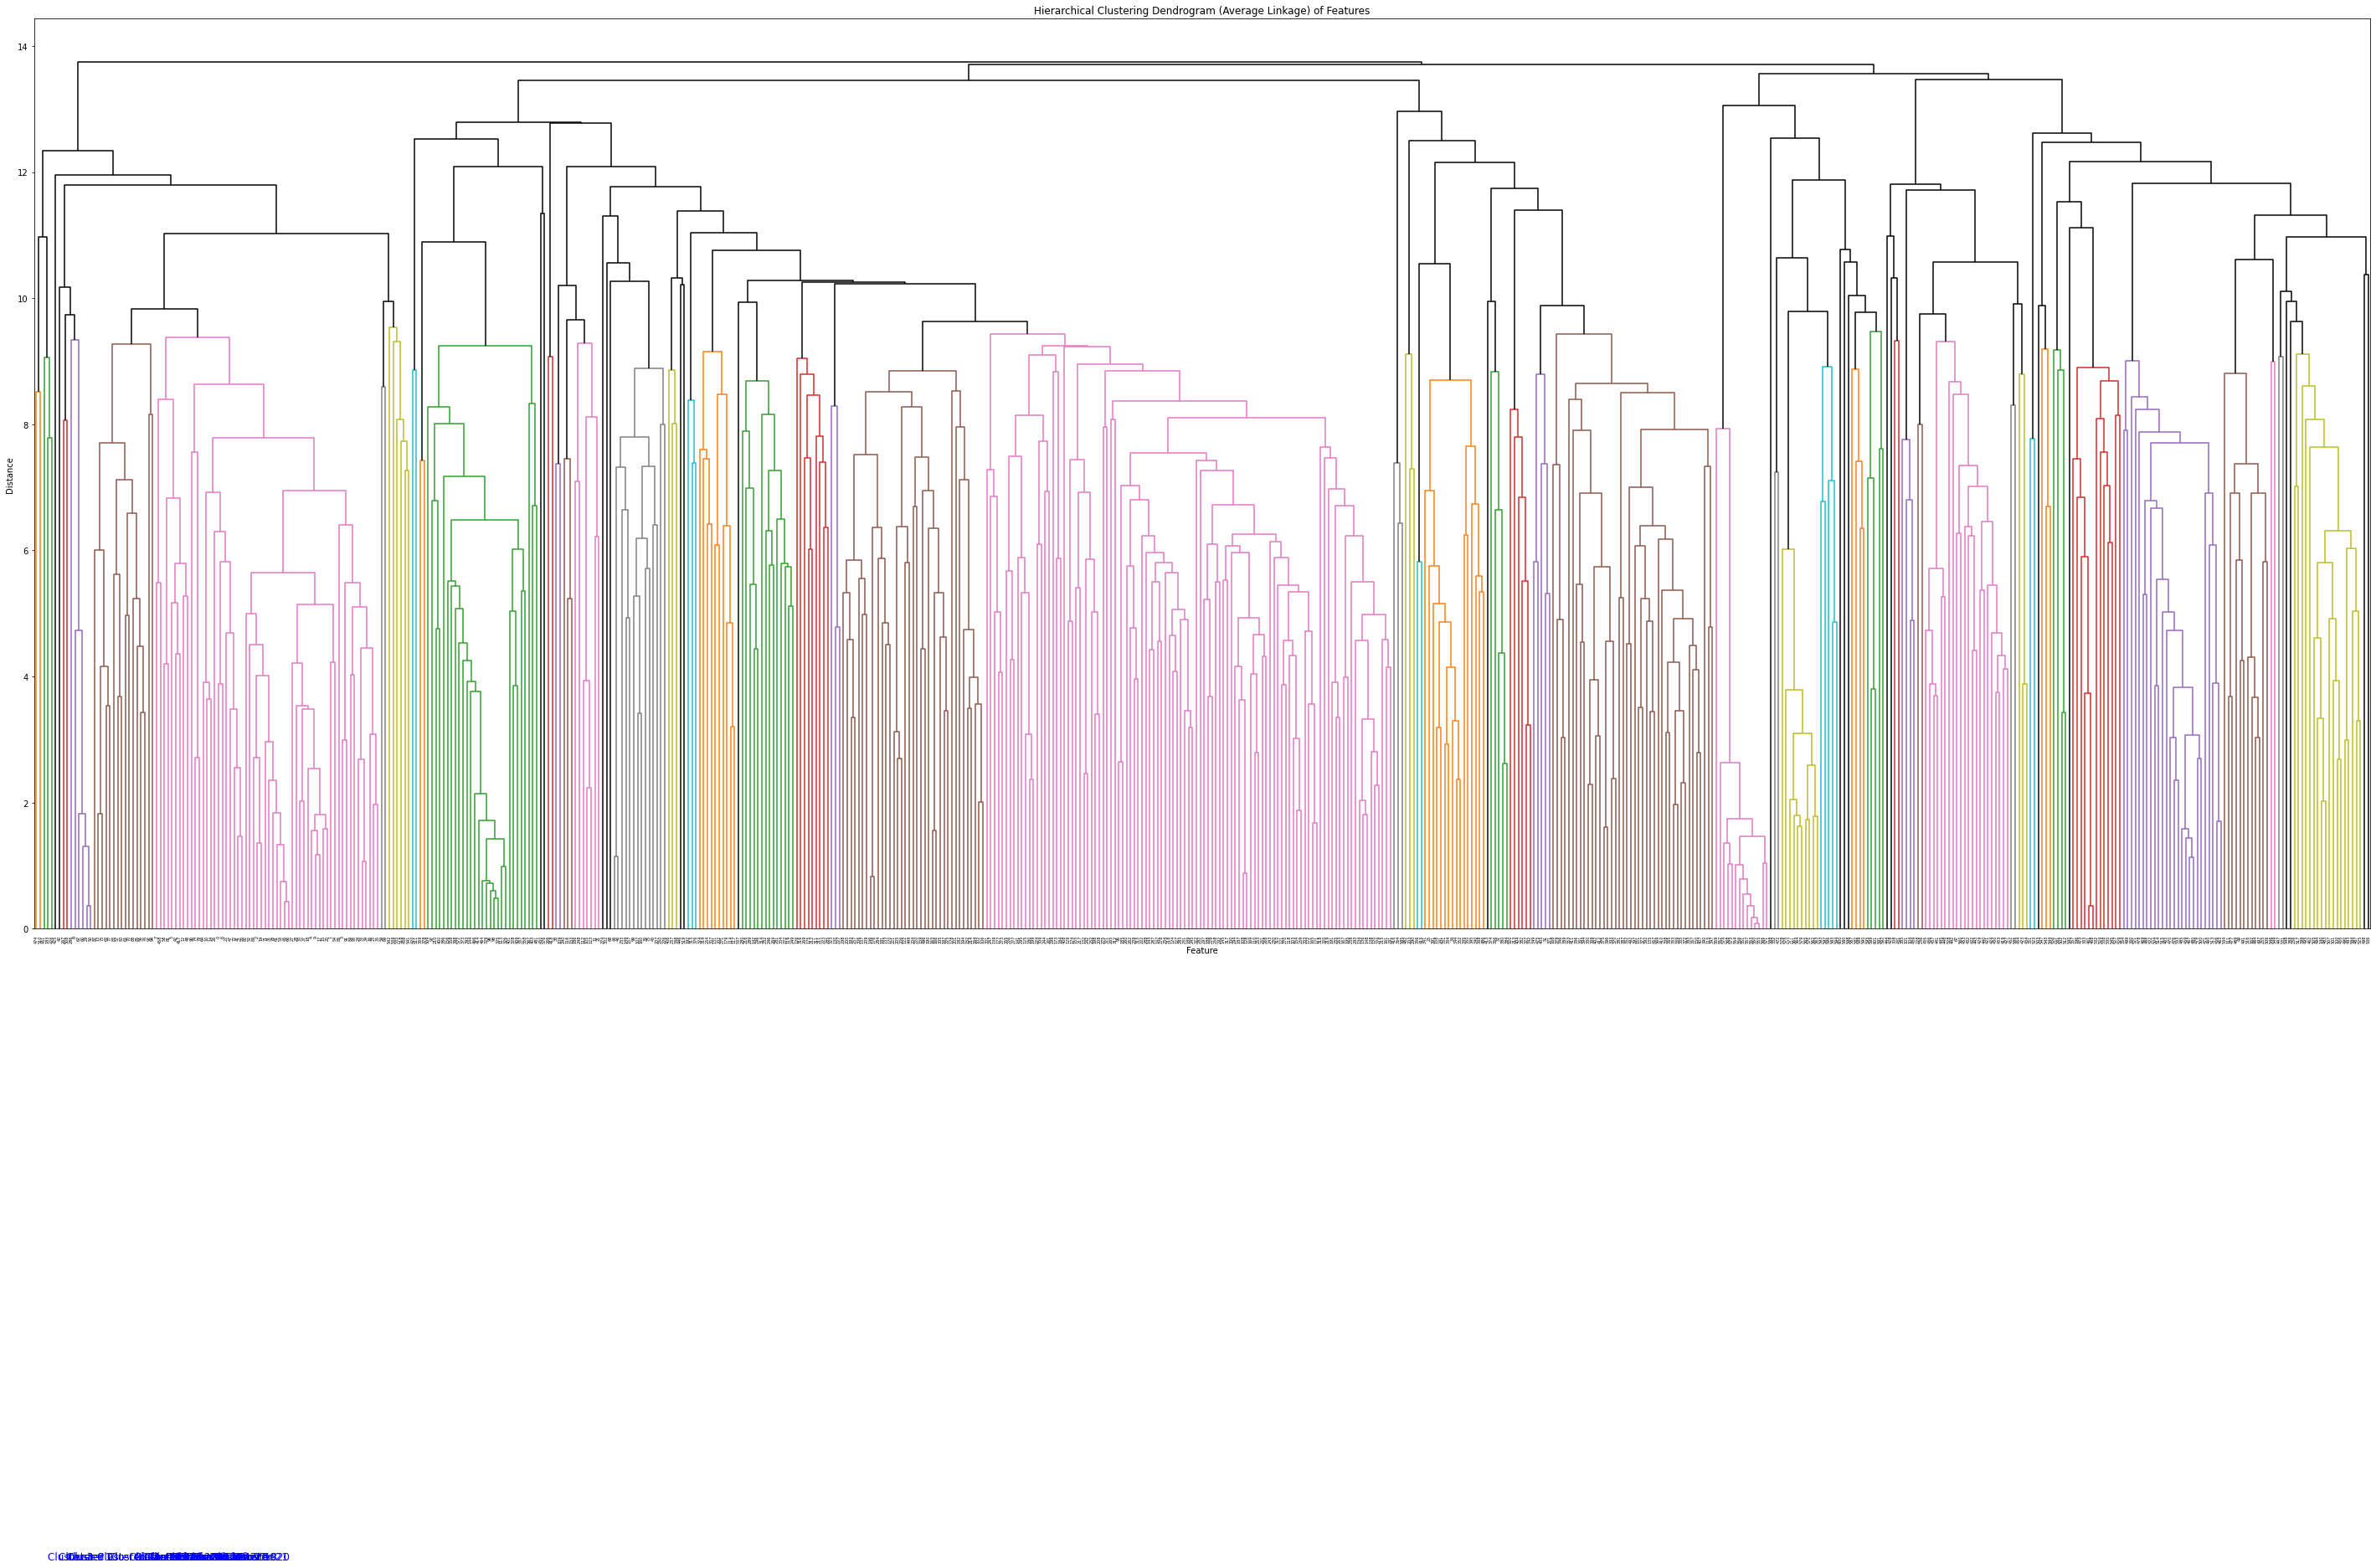

In [8]:
# Import dataset for HCA --> raw values
dat_cls = pd.read_csv(r'240617-NTA-Norm-Paper2-HCA-Input-RAW.csv', header=0)
dat_cls_np = dat_cls.to_numpy()
target_1 = dat_cls_np[:, 0]  # Convert target variables to 2D-array for sci-kit learn
data_1 = dat_cls_np[:, 1:]

# Z-scoring (mean zero, S.D. one; by column/feature)
scaler = StandardScaler()
data_1_standardized = scaler.fit_transform(data_1)

# Transpose the data to cluster features instead of samples
data_1_standardized_transposed = data_1_standardized.T

# Perform hierarchical clustering using average linkage and Euclidean distance
linked = linkage(data_1_standardized_transposed, method='average', metric='euclidean')

# Group features into clusters (up to 30 clusters)
max_clusters = 30
cluster_assignments = fcluster(linked, t=max_clusters, criterion='maxclust')

# Create a mapping of clusters and their features
cluster_dict = defaultdict(list)
for idx, cluster_num in enumerate(cluster_assignments):
    cluster_dict[cluster_num].append(dat_cls.columns[idx + 1])

# Increase figure size to better handle large data
plt.figure(figsize=(50, 20))

# Plot the dendrogram with more vibrant colors for each cluster
dendrogram(linked,
           labels=None,  # Disable feature labels
           color_threshold=0.7 * np.max(linked[:, 2]),  # Set color threshold to differentiate clusters
           above_threshold_color='black',  # Set color above the threshold to black
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=False)

# Adding cluster labels manually
for cluster_num, features in cluster_dict.items():
    x_positions = [dat_cls.columns.tolist().index(f) - 1 for f in features]
    if x_positions:  # Ensure positions are valid
        plt.text(np.mean(x_positions), -10, f'Cluster {cluster_num}',  # Adjust positioning
                 horizontalalignment='center', fontsize=12, color='blue')

# Adjusting plot appearance
plt.title('Hierarchical Clustering Dendrogram (Average Linkage) of Features')
plt.xlabel('Feature')
plt.ylabel('Distance')
plt.xticks(rotation=90)

# Save the figure to a .tiff file with proper DPI
plt.savefig('240617-Histogram-FULL-Cluster-Z-SCORE-AVG-EUC.tiff', dpi=1200, format='tiff', bbox_inches='tight')

# Display the figure in the notebook to check before saving
plt.show()

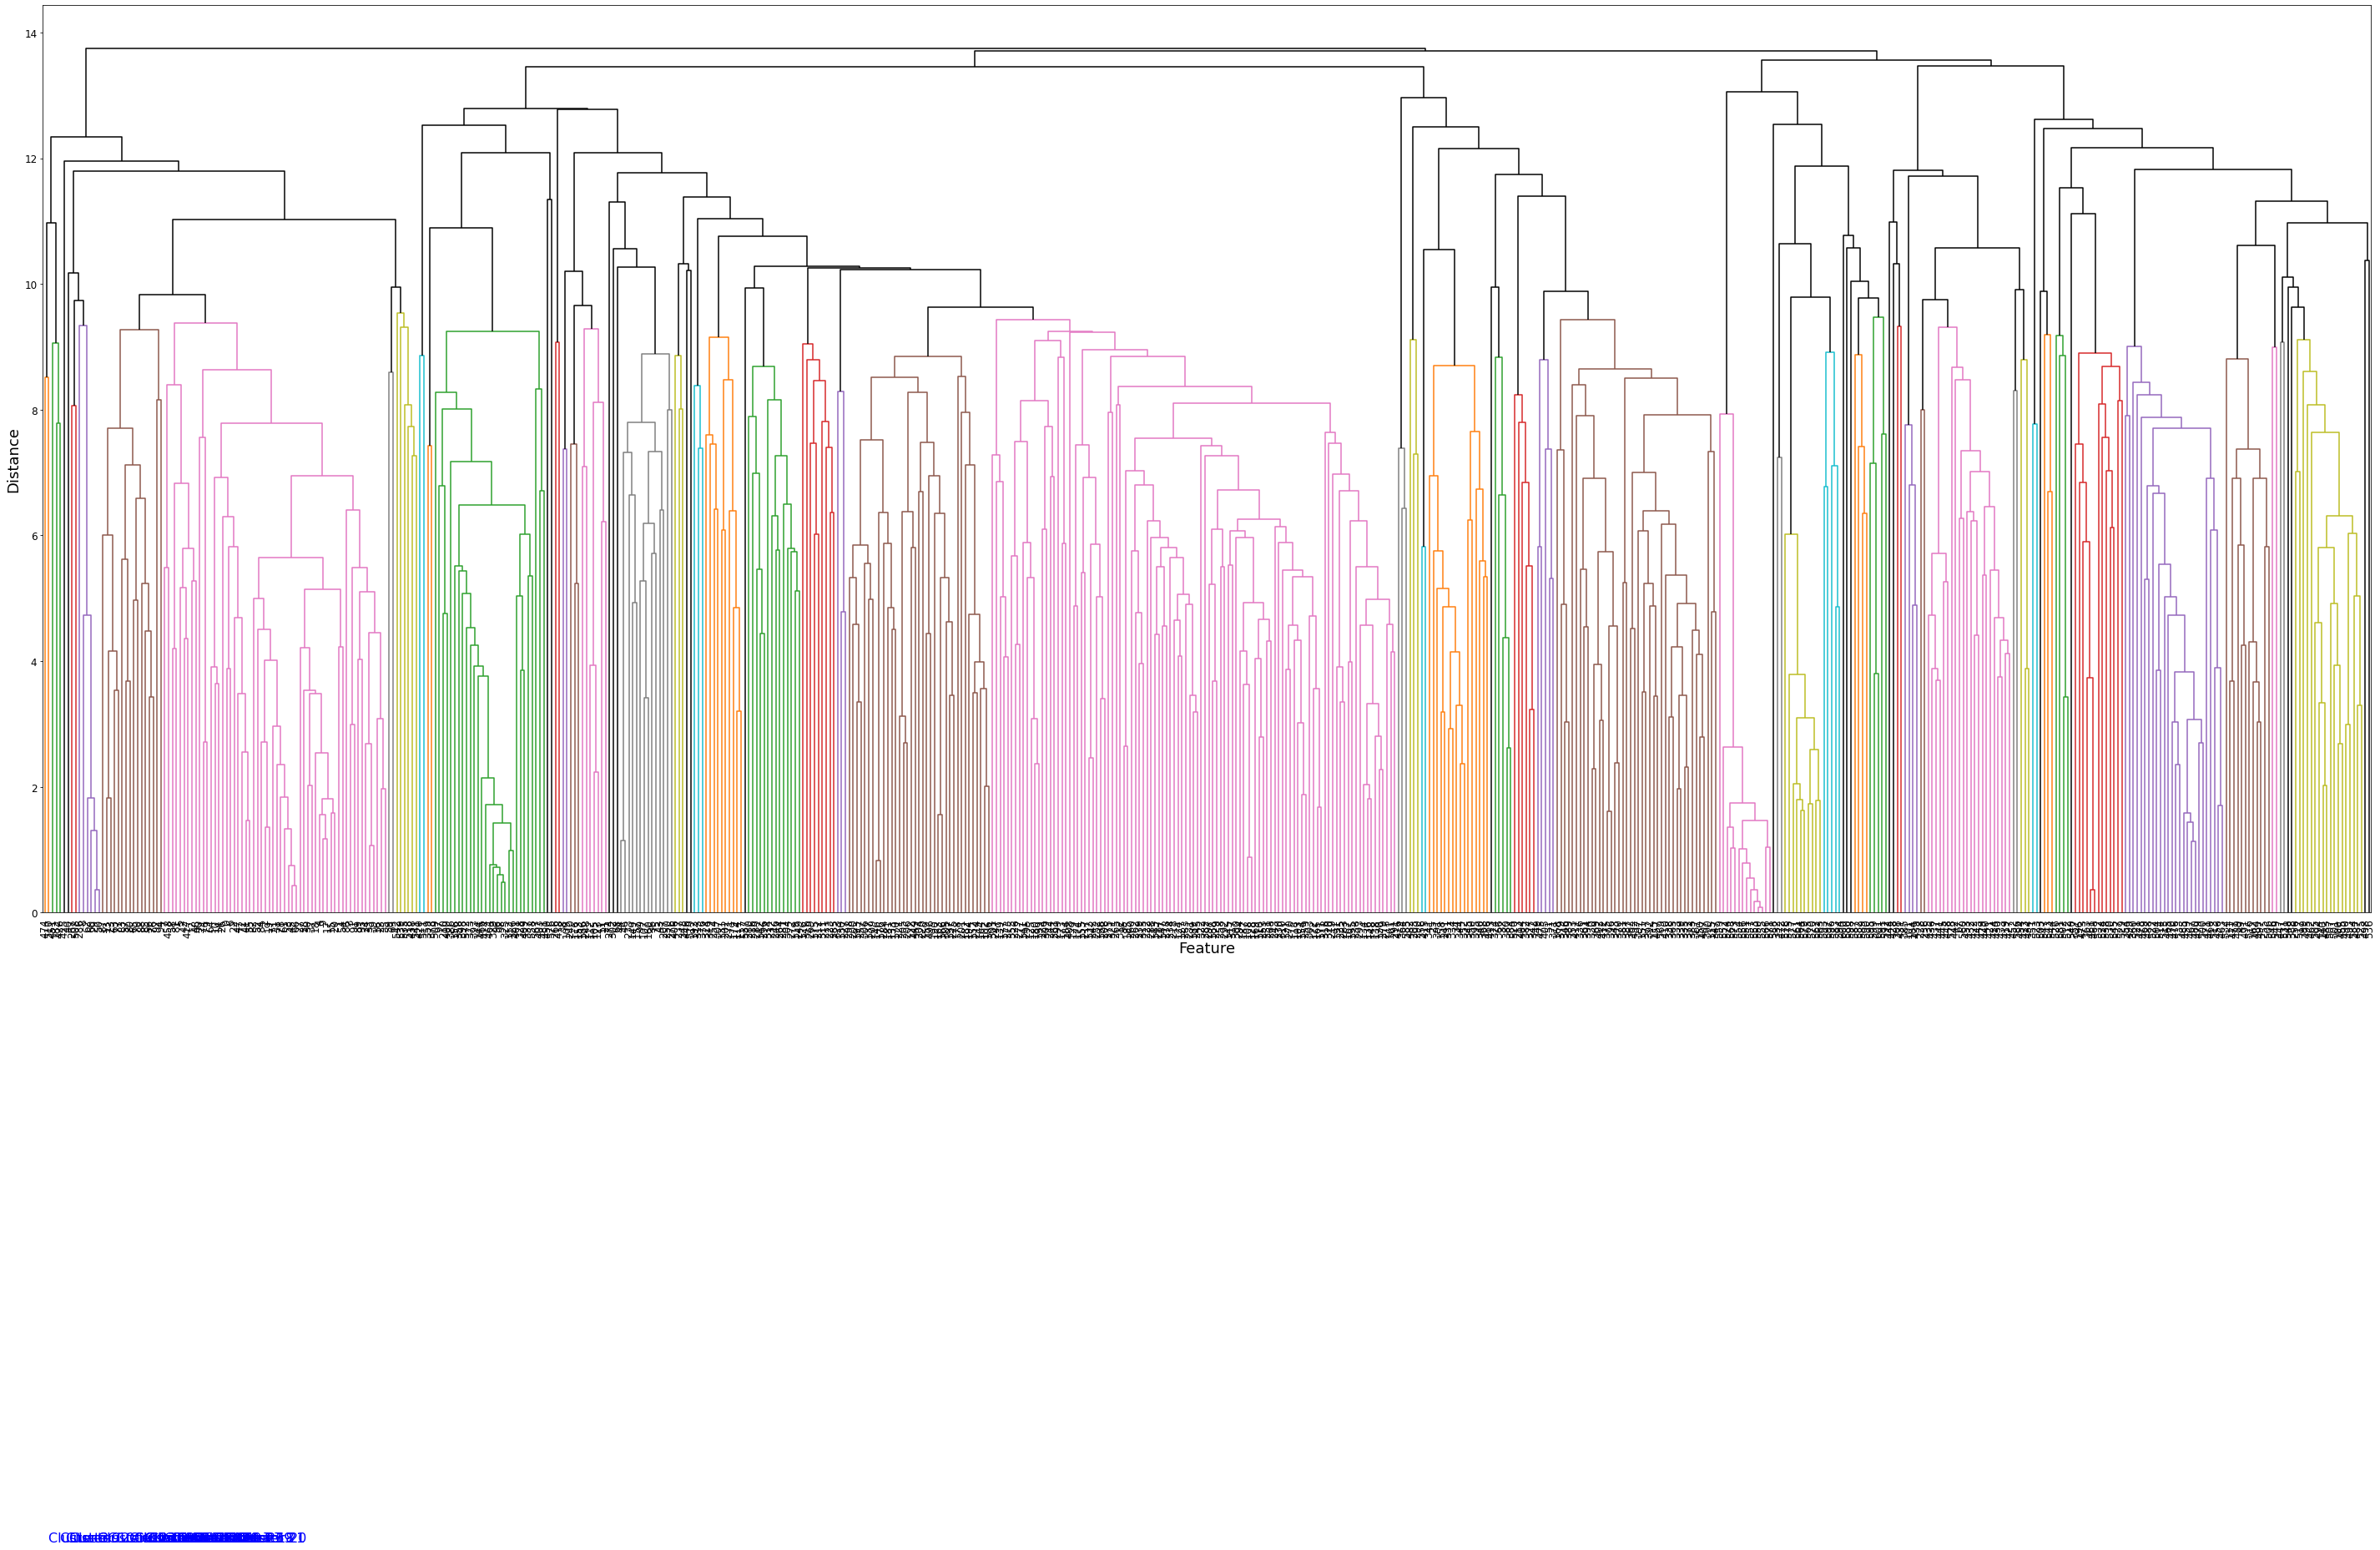

In [9]:
# Import dataset for HCA --> raw values
dat_cls = pd.read_csv(r'240617-NTA-Norm-Paper2-HCA-Input-RAW.csv', header=0)
dat_cls_np = dat_cls.to_numpy()
target_1 = dat_cls_np[:, 0]  # Convert target variables to 2D-array for sci-kit learn
data_1 = dat_cls_np[:, 1:]

# Z-scoring (mean zero, S.D. one; by column/feature)
scaler = StandardScaler()
data_1_standardized = scaler.fit_transform(data_1)

# Transpose the data to cluster features instead of samples
data_1_standardized_transposed = data_1_standardized.T

# Perform hierarchical clustering using average linkage and Euclidean distance
linked = linkage(data_1_standardized_transposed, method='average', metric='euclidean')

# Group features into clusters (up to 30 clusters)
max_clusters = 30
cluster_assignments = fcluster(linked, t=max_clusters, criterion='maxclust')

# Create a mapping of clusters and their features
cluster_dict = defaultdict(list)
for idx, cluster_num in enumerate(cluster_assignments):
    cluster_dict[cluster_num].append(dat_cls.columns[idx + 1])

# Increase figure size to better handle large data
plt.figure(figsize=(50, 20))

# Plot the dendrogram with more vibrant colors for each cluster
dendrogram(linked,
           labels=None,  # Disable feature labels
           color_threshold=0.7 * np.max(linked[:, 2]),  # Set color threshold to differentiate clusters
           above_threshold_color='black',  # Set color above the threshold to black
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=False)

# Adding cluster labels manually
for cluster_num, features in cluster_dict.items():
    x_positions = [dat_cls.columns.tolist().index(f) - 1 for f in features if f in dat_cls.columns]
    if x_positions:  # Ensure positions are valid
        plt.text(np.mean(x_positions), -10, f'Cluster {cluster_num}',  # Adjust positioning
                 horizontalalignment='center', fontsize=16, color='blue')

# Adjust y-axis label and axis font sizes
plt.xlabel('Feature', fontsize=18)
plt.ylabel('Distance', fontsize=18)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

# Remove the title
plt.title('')

# Save the figure to a .tiff file with a reduced DPI
plt.savefig('240617-Histogram-FULL-Cluster-Z-SCORE-AVG-EUC.tiff', dpi=600, format='tiff', bbox_inches='tight')

# Display the figure in the notebook to check before saving
plt.show()

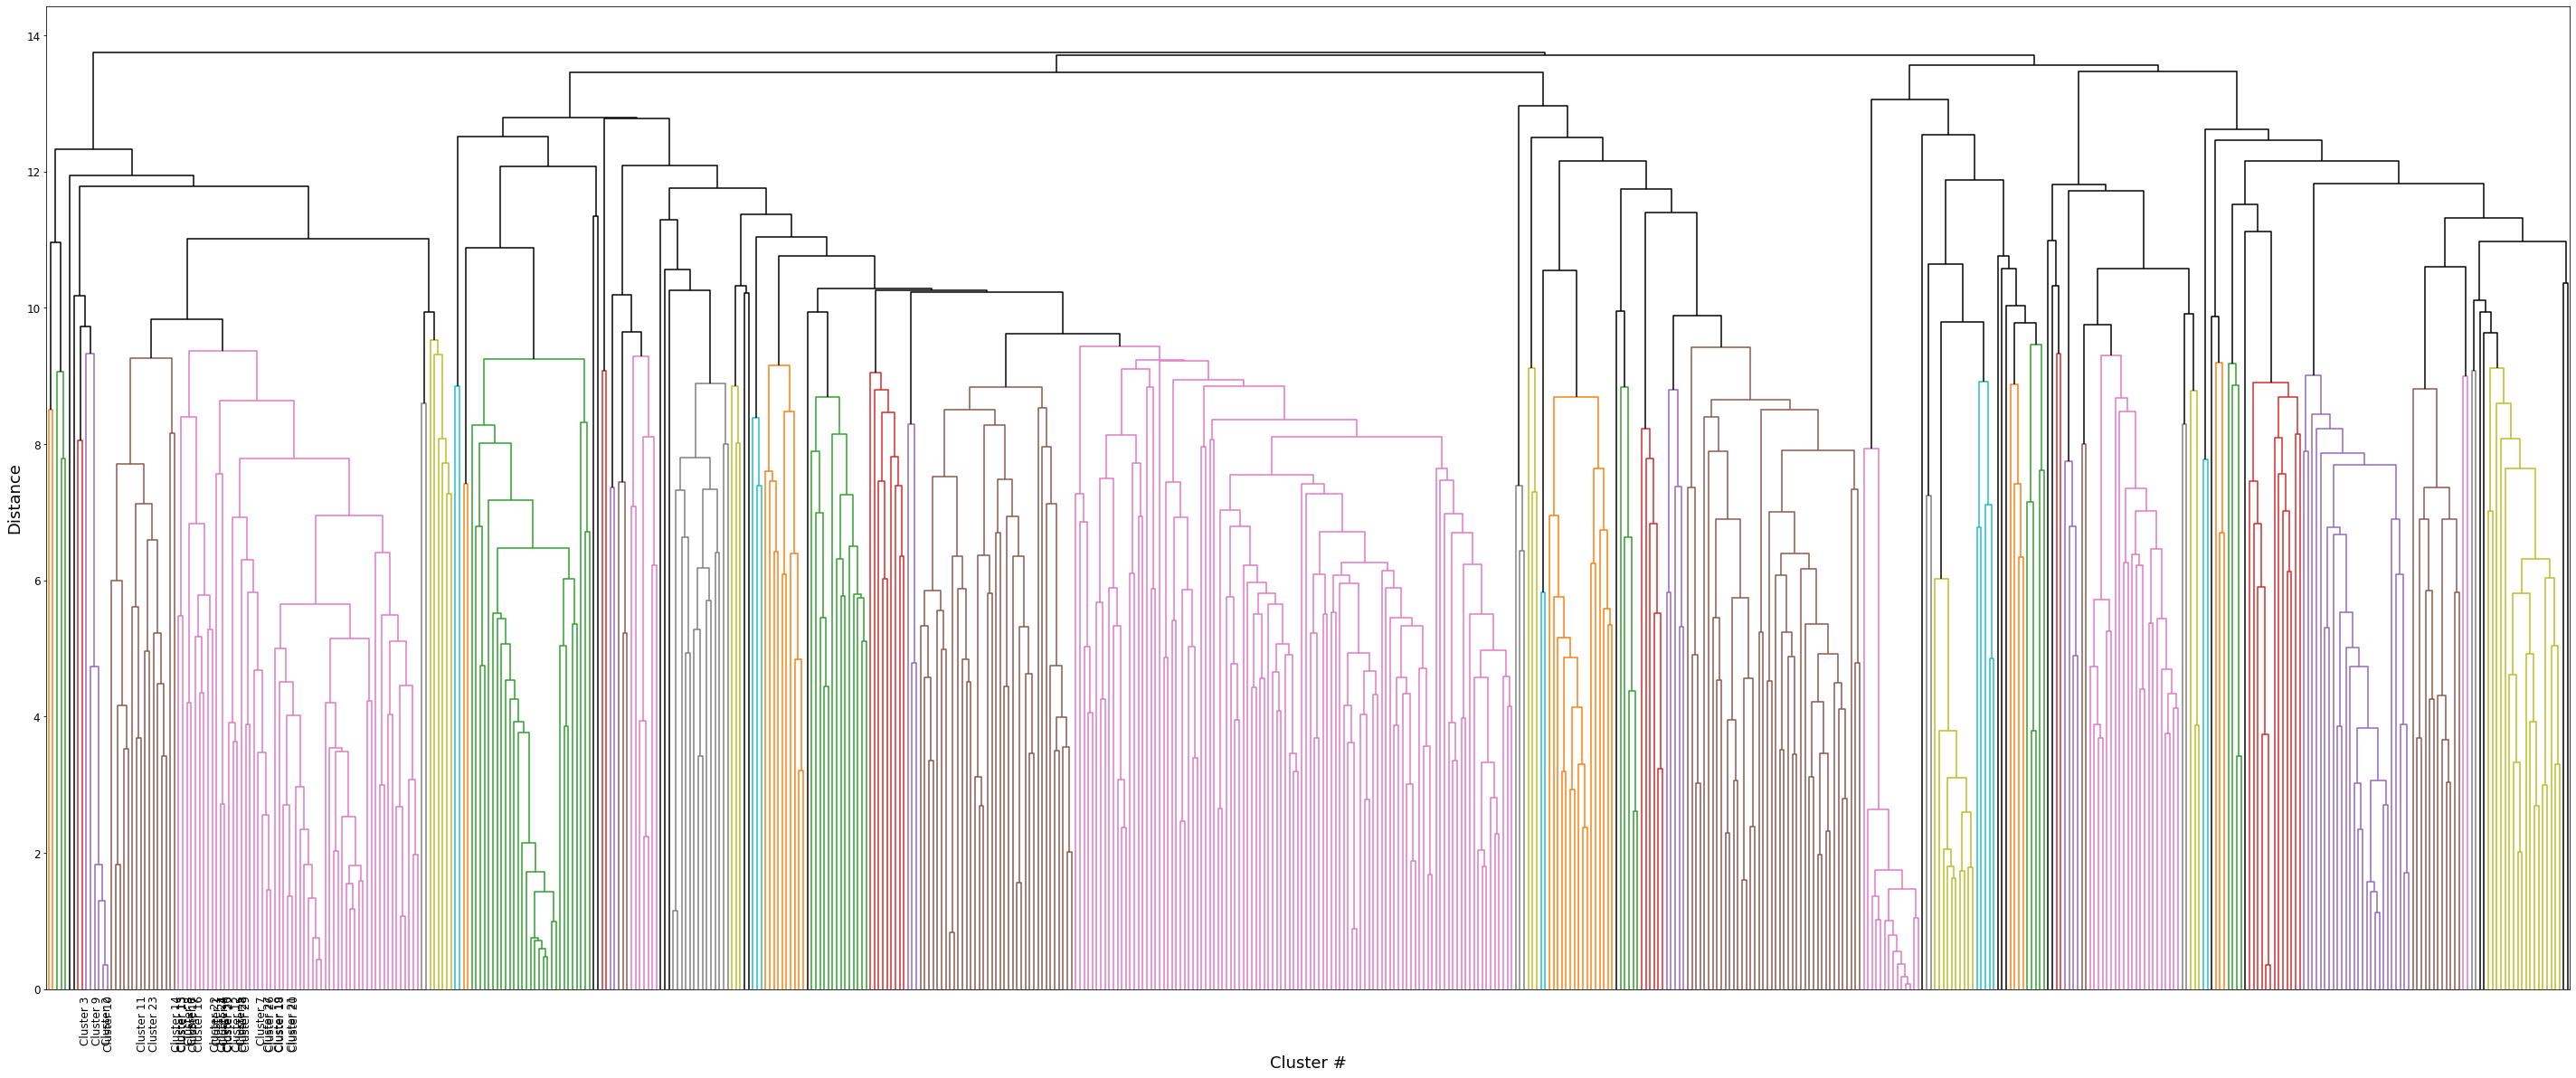

In [10]:
# Import dataset for HCA --> raw values
dat_cls = pd.read_csv(r'240617-NTA-Norm-Paper2-HCA-Input-RAW.csv', header=0)
dat_cls_np = dat_cls.to_numpy()
target_1 = dat_cls_np[:, 0]  # Convert target variables to 2D-array for sci-kit learn
data_1 = dat_cls_np[:, 1:]

# Z-scoring (mean zero, S.D. one; by column/feature)
scaler = StandardScaler()
data_1_standardized = scaler.fit_transform(data_1)

# Transpose the data to cluster features instead of samples
data_1_standardized_transposed = data_1_standardized.T

# Perform hierarchical clustering using average linkage and Euclidean distance
linked = linkage(data_1_standardized_transposed, method='average', metric='euclidean')

# Group features into clusters (up to 30 clusters)
max_clusters = 30
cluster_assignments = fcluster(linked, t=max_clusters, criterion='maxclust')

# Create a mapping of clusters and their features
cluster_dict = defaultdict(list)
for idx, cluster_num in enumerate(cluster_assignments):
    cluster_dict[cluster_num].append(dat_cls.columns[idx + 1])

# Increase figure size to better handle large data
plt.figure(figsize=(50, 20))

# Plot the dendrogram without feature labels
dendrogram(linked,
           labels=None,  # Disable feature labels completely
           color_threshold=0.7 * np.max(linked[:, 2]),  # Set color threshold to differentiate clusters
           above_threshold_color='black',  # Set color above the threshold to black
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=False)

# Replace x-axis with sequential cluster numbers
x_positions_cluster_numbers = []
for i in range(1, max_clusters + 1):
    # Get mean x position for all features in the same cluster
    features_in_cluster = cluster_dict[i]
    x_positions = [dat_cls.columns.tolist().index(f) - 1 for f in features_in_cluster]
    if x_positions:
        x_positions_cluster_numbers.append((np.mean(x_positions), i))

# Set custom tick positions with cluster numbers
x_ticks_positions, x_ticks_labels = zip(*x_positions_cluster_numbers)
plt.xticks(x_ticks_positions, labels=[f'Cluster {i}' for i in x_ticks_labels], fontsize=12, rotation=90)

# Adjust y-axis label and axis font sizes
plt.xlabel('Cluster #', fontsize=18)
plt.ylabel('Distance', fontsize=18)
plt.yticks(fontsize=12)

# Save the figure to a .tiff file with a reduced DPI
plt.savefig('240617-Histogram-FULL-Cluster-Z-SCORE-AVG-EUC-NEW.tiff', dpi=600, format='tiff', bbox_inches='tight')

# Display the figure in the notebook to check before saving
plt.show()

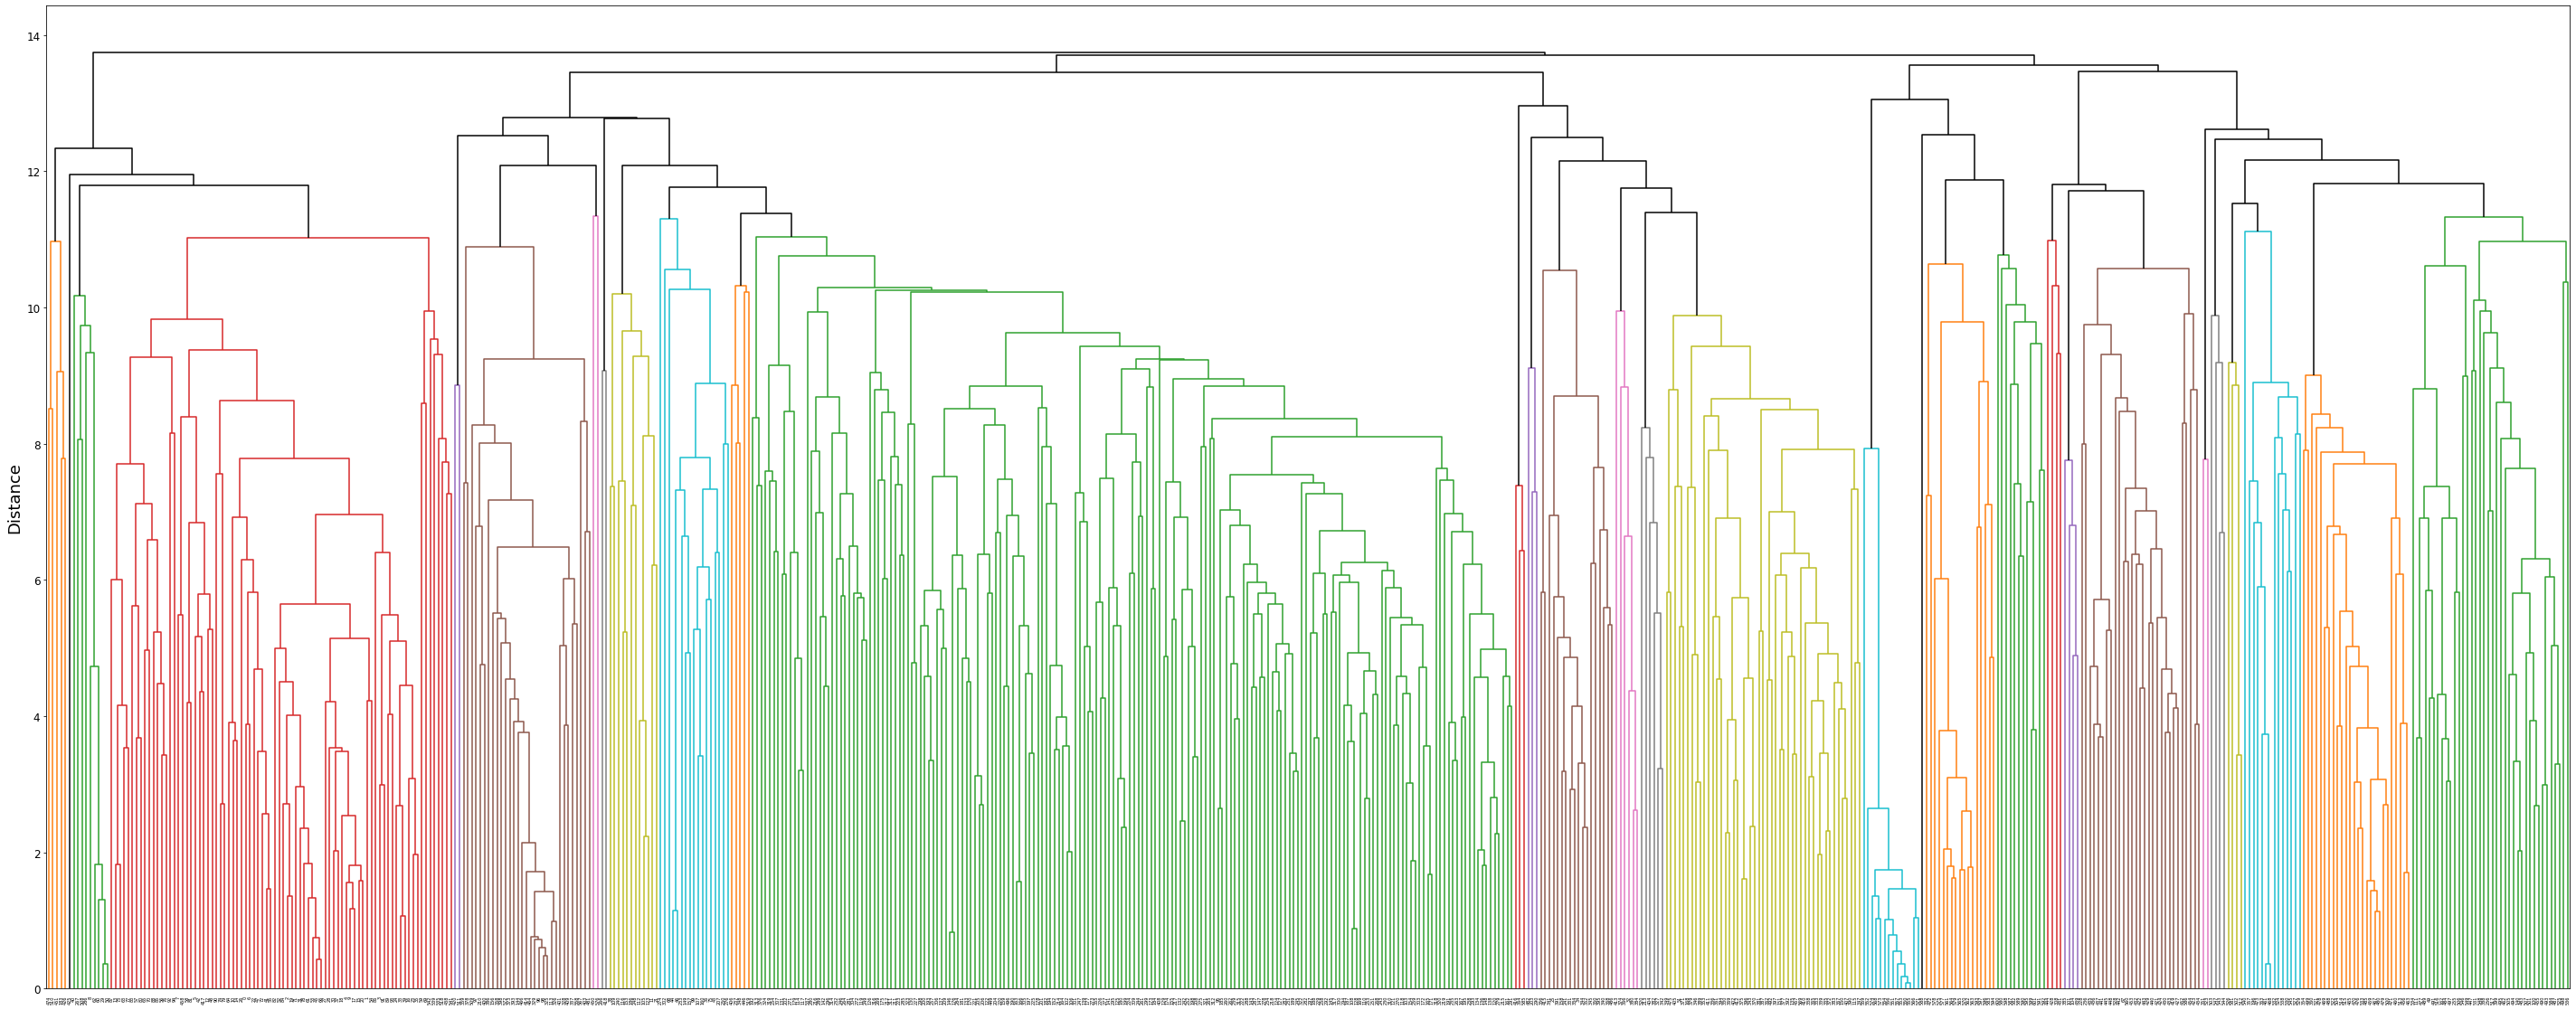

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from collections import defaultdict

# Import dataset for HCA --> raw values
dat_cls = pd.read_csv(r'240617-NTA-Norm-Paper2-HCA-Input-RAW.csv', header=0)
dat_cls_np = dat_cls.to_numpy()
target_1 = dat_cls_np[:, 0]  # Convert target variables to 2D-array for sci-kit learn
data_1 = dat_cls_np[:, 1:]

# Z-scoring (mean zero, S.D. one; by column/feature)
scaler = StandardScaler()
data_1_standardized = scaler.fit_transform(data_1)

# Transpose the data to cluster features instead of samples
data_1_standardized_transposed = data_1_standardized.T

# Perform hierarchical clustering using average linkage and Euclidean distance
linked = linkage(data_1_standardized_transposed, method='average', metric='euclidean')

# Group features into clusters (up to 30 clusters)
max_clusters = 30
cluster_assignments = fcluster(linked, t=max_clusters, criterion='maxclust')

# Create a mapping of clusters and their features
cluster_dict = defaultdict(list)
for idx, cluster_num in enumerate(cluster_assignments):
    cluster_dict[cluster_num].append(dat_cls.columns[idx + 1])

# Increase figure size to better handle large data
plt.figure(figsize=(50, 20))

# Plot the dendrogram and force 30 distinct clusters
color_threshold = linked[-max_clusters, 2]  # Set the color threshold to form exactly 30 clusters
dendrogram(linked,
           labels=None,  # Disable feature labels completely
           color_threshold=color_threshold,  # Set color threshold for exactly 30 clusters
           above_threshold_color='black',  # Set color above the threshold to black
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=False)

# Adjust y-axis label and axis font sizes, but remove x-axis title
plt.ylabel('Distance', fontsize=18)
plt.yticks(fontsize=12)

# Remove the x-axis title
plt.gca().set_xlabel('')

# Save the figure to a .tiff file with a reduced DPI
plt.savefig('240617-Histogram-FULL-Cluster-Z-SCORE-AVG-EUC-FINAL.tiff', dpi=600, format='tiff', bbox_inches='tight')

# Display the figure in the notebook to check before saving
plt.show()

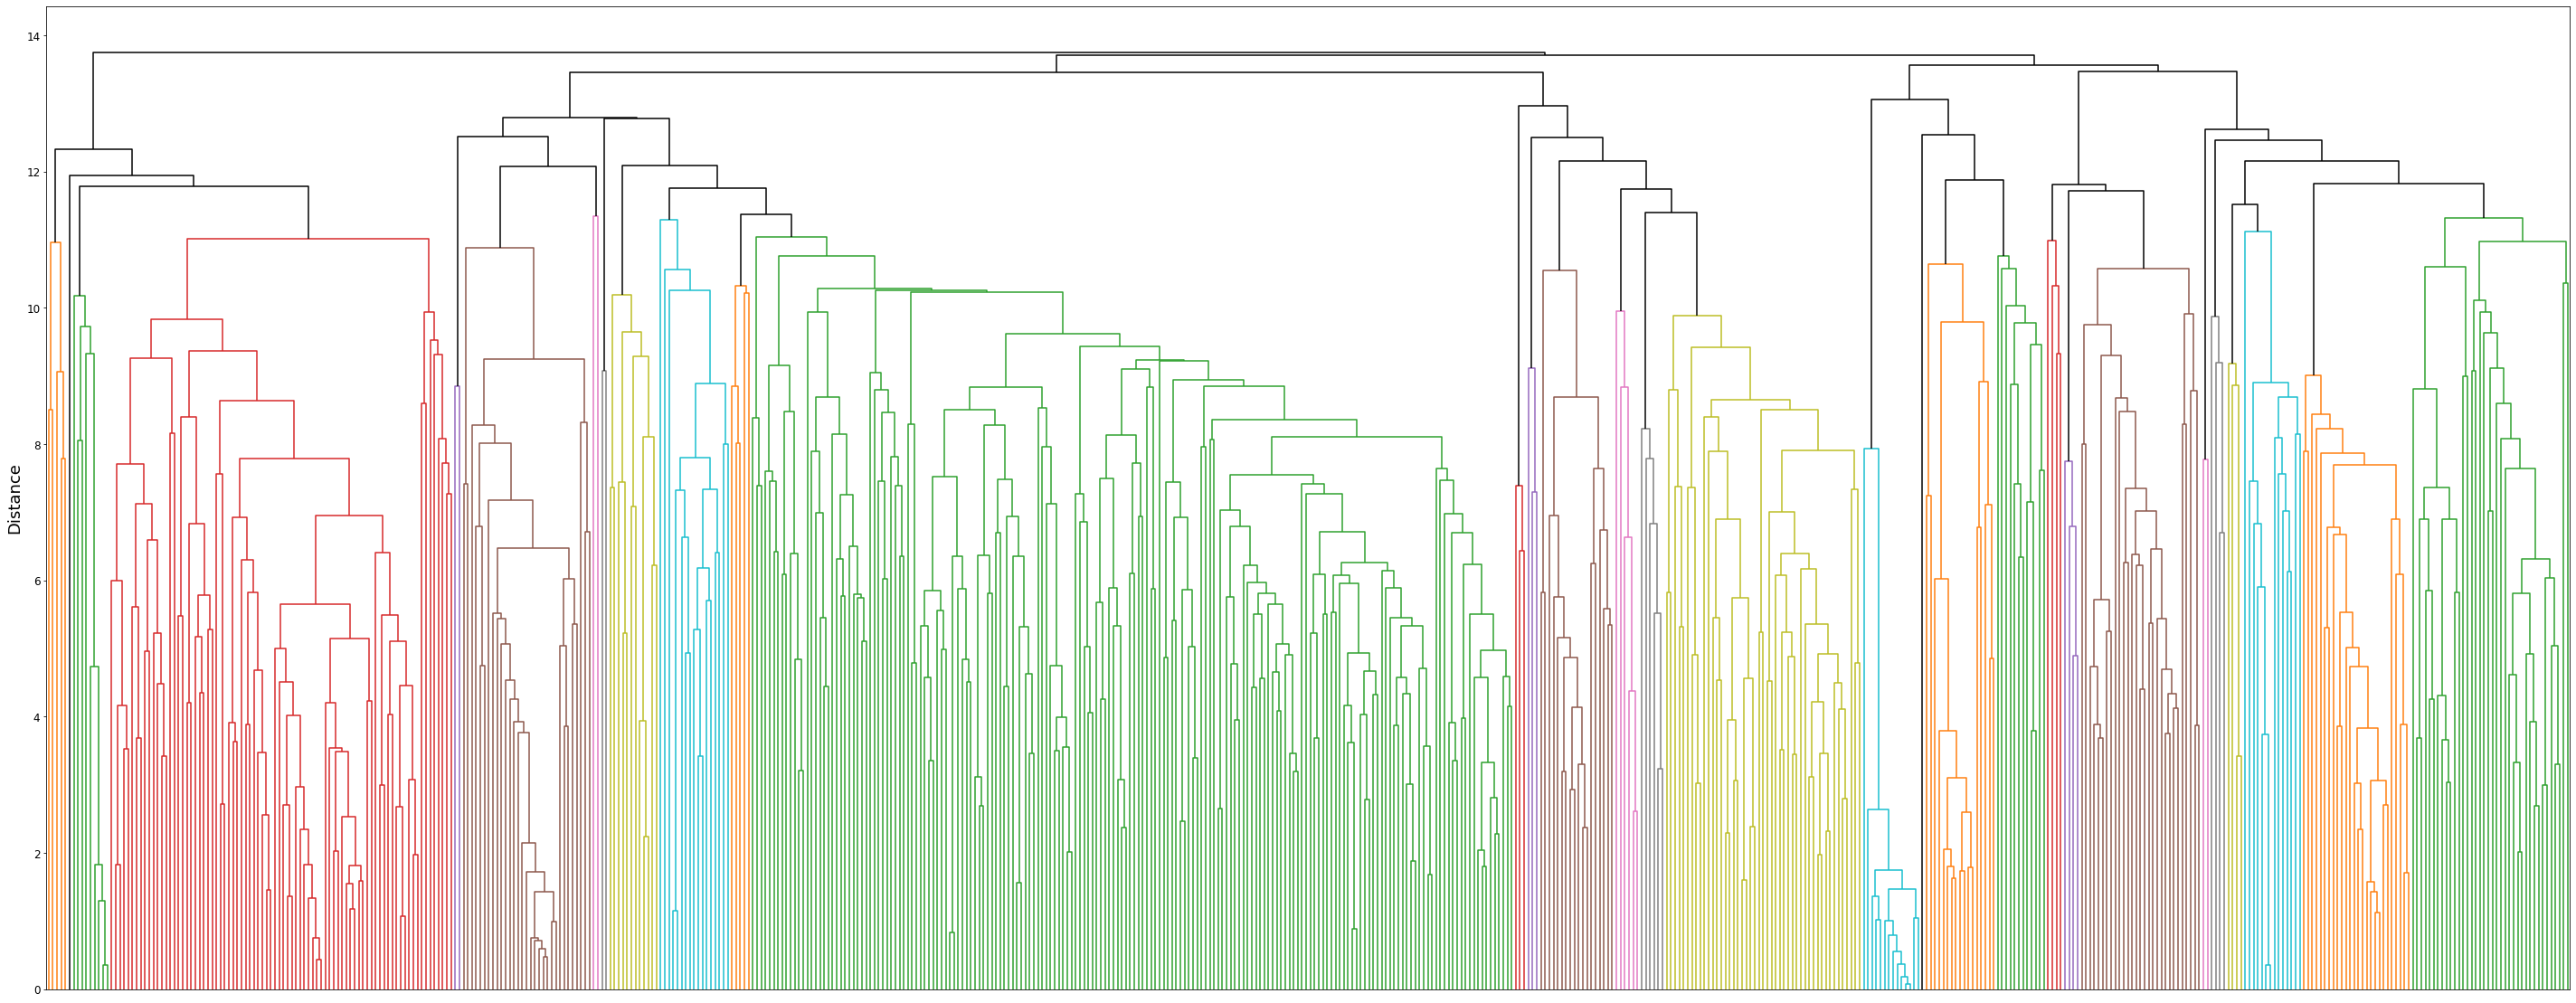

In [12]:
# Import dataset for HCA --> raw values
dat_cls = pd.read_csv(r'240617-NTA-Norm-Paper2-HCA-Input-RAW.csv', header=0)
dat_cls_np = dat_cls.to_numpy()
target_1 = dat_cls_np[:, 0]  # Convert target variables to 2D-array for sci-kit learn
data_1 = dat_cls_np[:, 1:]

# Z-scoring (mean zero, S.D. one; by column/feature)
scaler = StandardScaler()
data_1_standardized = scaler.fit_transform(data_1)

# Transpose the data to cluster features instead of samples
data_1_standardized_transposed = data_1_standardized.T

# Perform hierarchical clustering using average linkage and Euclidean distance
linked = linkage(data_1_standardized_transposed, method='average', metric='euclidean')

# Group features into clusters (up to 30 clusters)
max_clusters = 30
cluster_assignments = fcluster(linked, t=max_clusters, criterion='maxclust')

# Create a mapping of clusters and their features
cluster_dict = defaultdict(list)
for idx, cluster_num in enumerate(cluster_assignments):
    cluster_dict[cluster_num].append(dat_cls.columns[idx + 1])

# Increase figure size to better handle large data
plt.figure(figsize=(50, 20))

# Plot the dendrogram and force 30 distinct clusters
color_threshold = linked[-max_clusters, 2]  # Set the color threshold to form exactly 30 clusters
dendrogram(linked,
           labels=None,  # Disable feature labels completely
           color_threshold=color_threshold,  # Set color threshold for exactly 30 clusters
           above_threshold_color='black',  # Set color above the threshold to black
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=False)

# Adjust y-axis label and axis font sizes, but remove x-axis title
plt.ylabel('Distance', fontsize=18)
plt.yticks(fontsize=12)

# Remove x-axis labels and title completely
plt.xticks([])  # This will remove all tick marks and labels from the x-axis
plt.gca().set_xlabel('')

# Save the figure to a .tiff file with a reduced DPI
plt.savefig('240911-Histogram-FULL-Cluster-Z-SCORE-AVG-EUC-FINAL.tiff', dpi=600, format='tiff', bbox_inches='tight')

# Display the figure in the notebook to check before saving
plt.show()

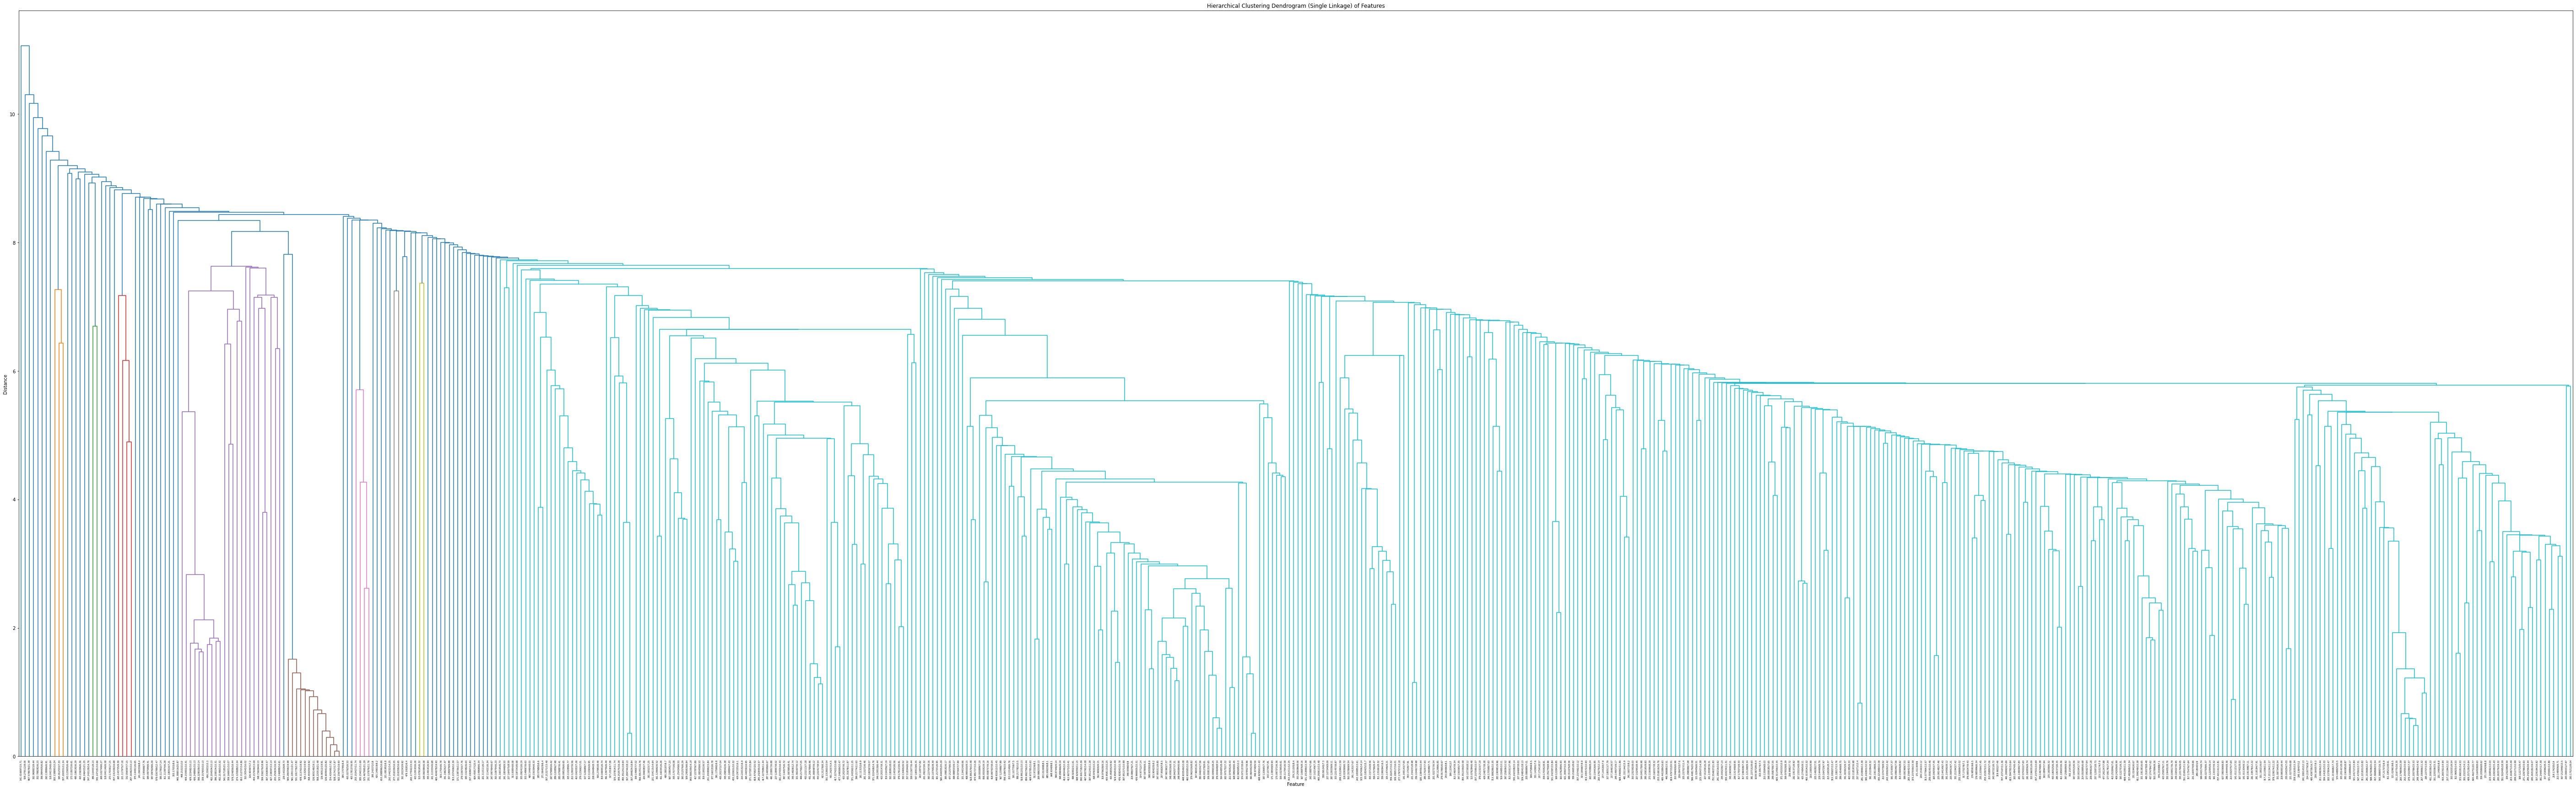

<Figure size 432x288 with 0 Axes>

In [6]:
# Transpose the data to cluster features instead of samples
data_1_standardized_transposed = data_1_standardized.T

# Perform hierarchical clustering using average linkage and Euclidean distance
linked = linkage(data_1_standardized_transposed, method='single', metric='euclidean')

# Plot the dendrogram with column labels
plt.figure(figsize=(100, 30))
dendrogram(linked,
           labels=dat_cls.columns[1:],  # Exclude the target column header
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True)

plt.title('Hierarchical Clustering Dendrogram (Single Linkage) of Features')
plt.xlabel('Feature')
plt.ylabel('Distance')
plt.xticks(rotation=90)
plt.show()

# Save the figure to a JPG file
plt.savefig('240617-Histogram-FULL-Cluster-Z-SCORE-SING-EUC', dpi = 1500, bbox_inches='tight')
plt.show()

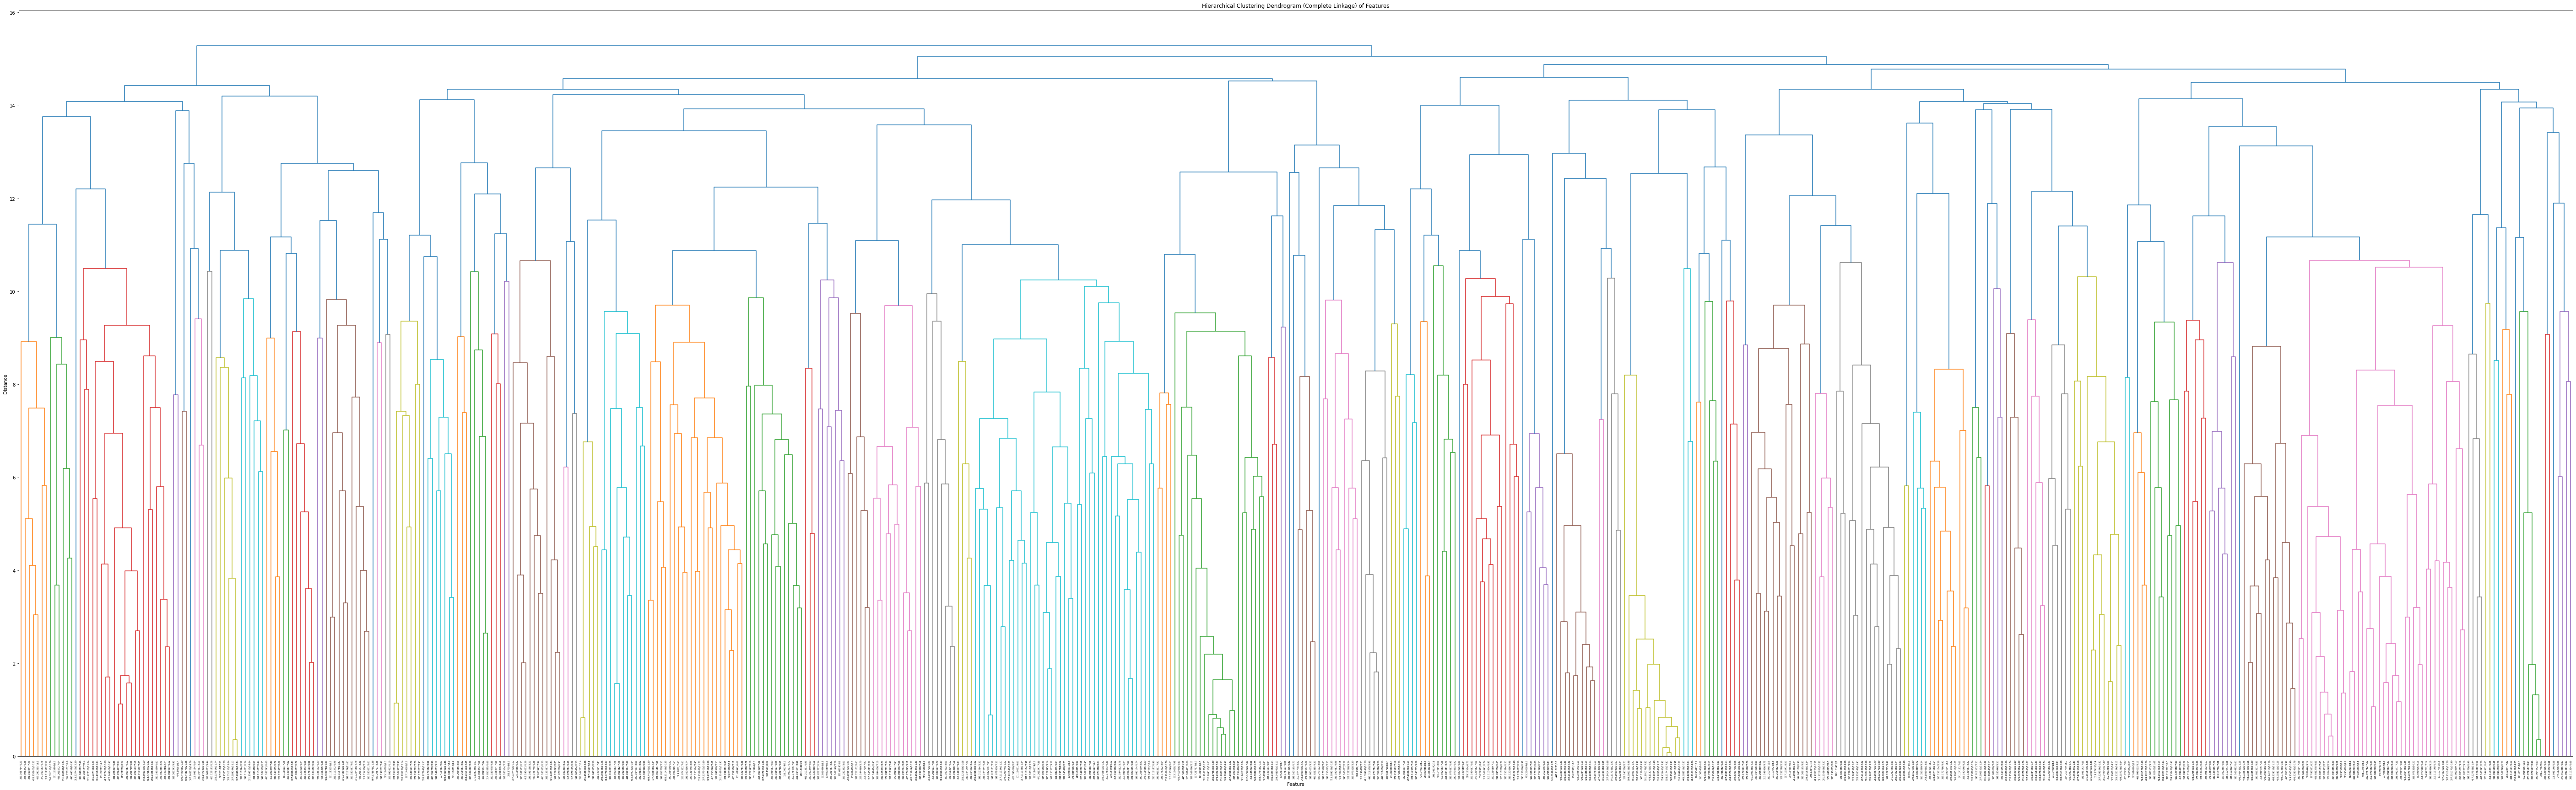

<Figure size 432x288 with 0 Axes>

In [7]:
# Transpose the data to cluster features instead of samples
data_1_standardized_transposed = data_1_standardized.T

# Perform hierarchical clustering using average linkage and Euclidean distance
linked = linkage(data_1_standardized_transposed, method='complete', metric='euclidean')

# Plot the dendrogram with column labels
plt.figure(figsize=(100, 30))
dendrogram(linked,
           labels=dat_cls.columns[1:],  # Exclude the target column header
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True)

plt.title('Hierarchical Clustering Dendrogram (Complete Linkage) of Features')
plt.xlabel('Feature')
plt.ylabel('Distance')
plt.xticks(rotation=90)
plt.show()

# Save the figure to a JPG file
plt.savefig('240617-Histogram-FULL-Cluster-Z-SCORE-COM-EU.png', dpi = 1500, bbox_inches='tight')
plt.show()

For n_clusters = 10, the average silhouette_score is : 0.1464068786510326
For n_clusters = 11, the average silhouette_score is : 0.14479193797966264
For n_clusters = 12, the average silhouette_score is : 0.15181737603310988
For n_clusters = 13, the average silhouette_score is : 0.14601112294455126
For n_clusters = 14, the average silhouette_score is : 0.1471266124828815
For n_clusters = 15, the average silhouette_score is : 0.1536188740491679
For n_clusters = 16, the average silhouette_score is : 0.14430606935859383
For n_clusters = 17, the average silhouette_score is : 0.14709717683556492
For n_clusters = 18, the average silhouette_score is : 0.15416280632901658
For n_clusters = 19, the average silhouette_score is : 0.15980327037554076
For n_clusters = 20, the average silhouette_score is : 0.16254794895707353
For n_clusters = 21, the average silhouette_score is : 0.1634007773116543
For n_clusters = 22, the average silhouette_score is : 0.16615808569505136
For n_clusters = 23, the aver

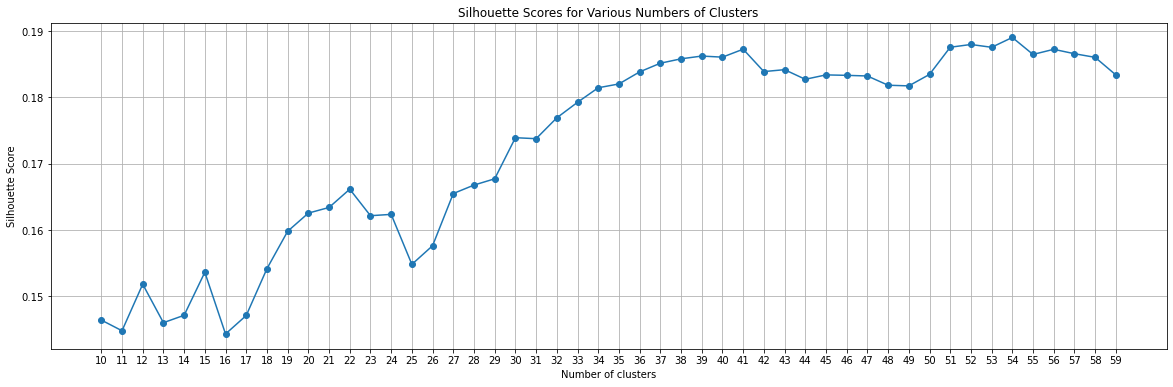

In [8]:
# Evaluate the optimal number of clusters using silhouette score
silhouette_scores = []
range_n_clusters = range(10, 60)

for n_clusters in range_n_clusters:
    clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='complete')
    cluster_labels = clustering.fit_predict(data_1_standardized_transposed)
    
    silhouette_avg = silhouette_score(data_1_standardized_transposed, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

# Plot silhouette scores
plt.figure(figsize=(20, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Various Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

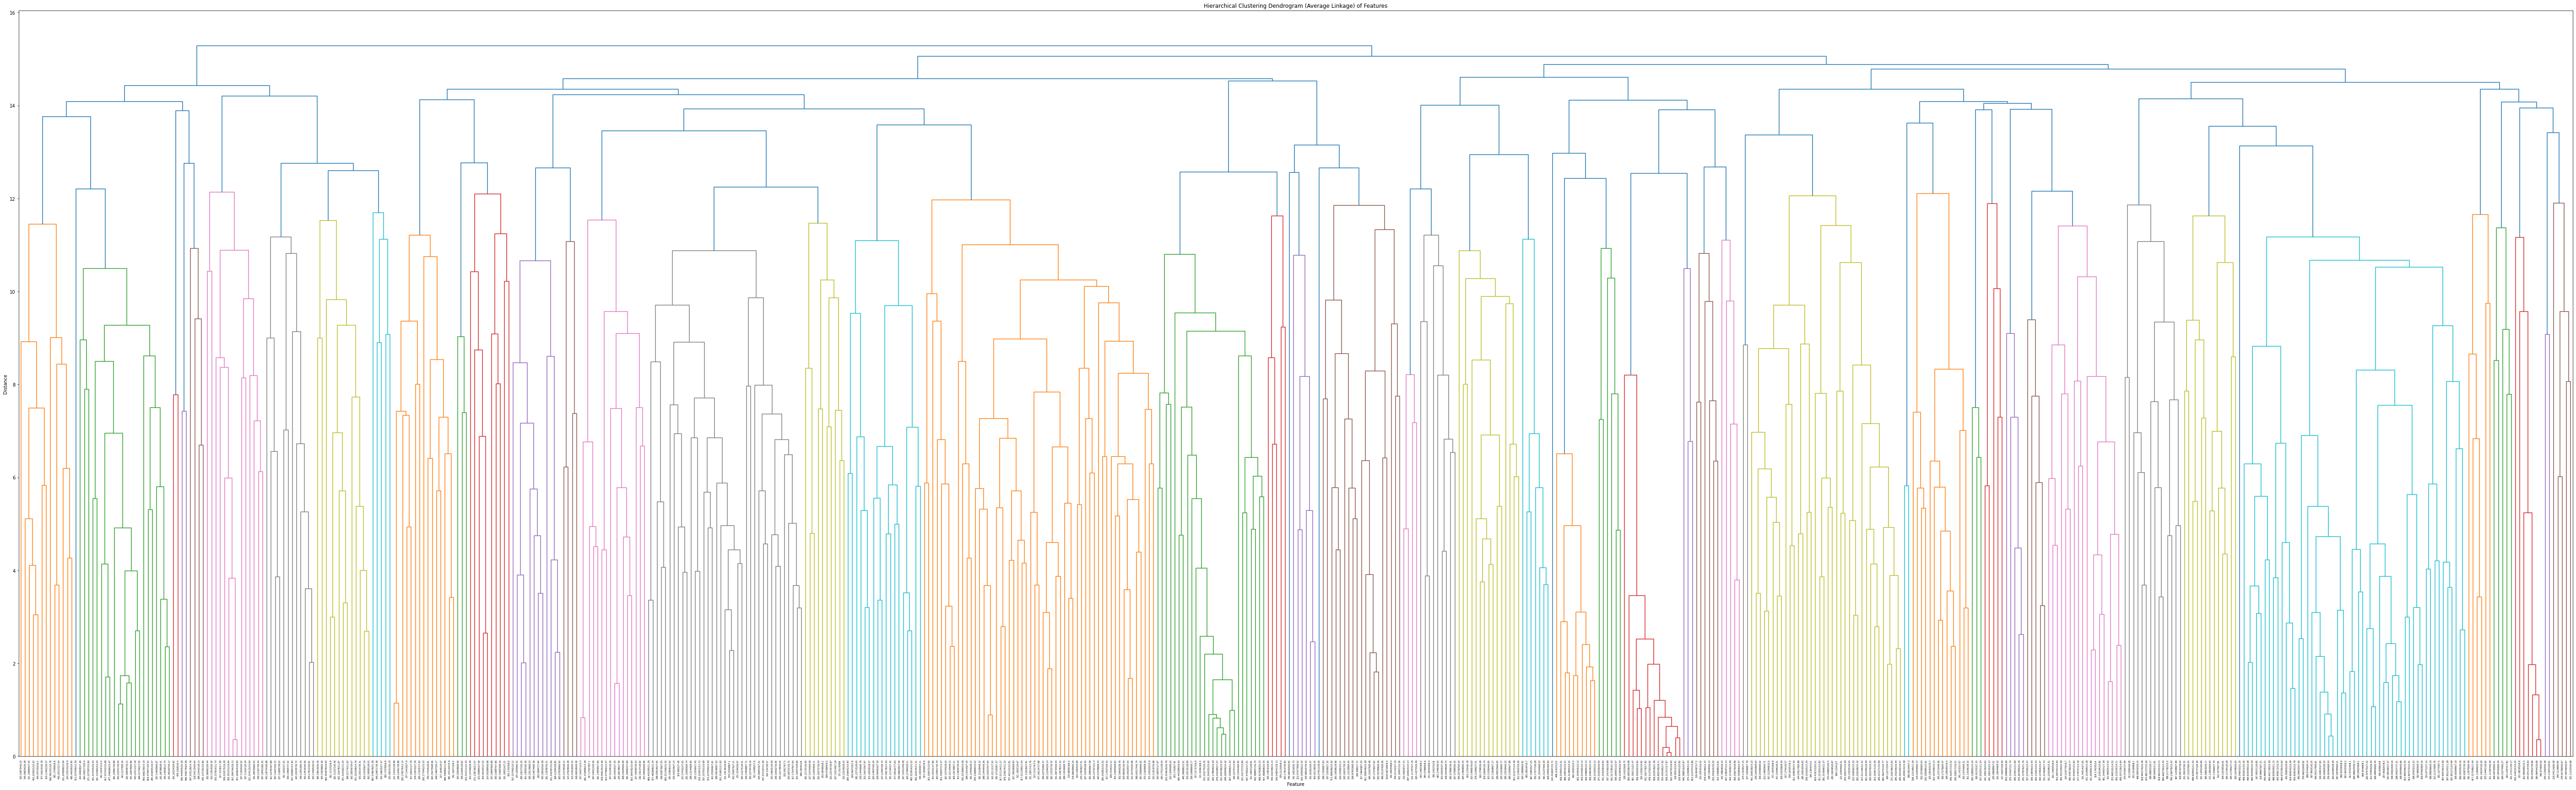

<Figure size 432x288 with 0 Axes>

Dendrogram with 54 clusters plotted and feature clusters saved to 'feature_clusters.xlsx'.


In [9]:
# Perform hierarchical clustering using average linkage and Euclidean distance
linked = linkage(data_1_standardized_transposed, method='complete', metric='euclidean')

# Plot the dendrogram with column labels
plt.figure(figsize=(100, 30))
dendrogram(linked,
           labels=dat_cls.columns[1:],  # Exclude the target column header
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True,
           color_threshold=linked[-54, 2])  # Color threshold for 16 clusters

plt.title('Hierarchical Clustering Dendrogram (Average Linkage) of Features')
plt.xlabel('Feature')
plt.ylabel('Distance')
plt.xticks(rotation=90)
plt.show()

# Save the figure to a JPG file
plt.savefig('Z-SCORE-Histogram-FULL-Cluster-54-COMPLETE-EUC.png', dpi=1500, bbox_inches='tight')
plt.show()

# Extract cluster labels for each feature using the fcluster function
cluster_labels = fcluster(linked, t=54, criterion='maxclust')

# Create a DataFrame to store features and their corresponding cluster labels
features_clusters = pd.DataFrame({
    'Feature': dat_cls.columns[1:],  # Exclude the target column header
    'Cluster': cluster_labels
})

# Create an Excel writer object
writer = pd.ExcelWriter('feature_clusters_Z-SCORE_54clus_COMPLETE_EUC.xlsx', engine='xlsxwriter')

# Write each cluster's features to a separate sheet in the Excel file
for cluster_num in range(1, 55):
    cluster_features = features_clusters[features_clusters['Cluster'] == cluster_num]
    cluster_features.to_excel(writer, sheet_name=f'Cluster_{cluster_num}', index=False)

# Save the Excel file
writer.save()

print("Dendrogram with 54 clusters plotted and feature clusters saved to 'feature_clusters.xlsx'.")

In [10]:
# Get the number of individual nodes (features)
num_features = data_1_standardized_transposed.shape[0]
print(f"Number of individual nodes (features): {num_features}")

Number of individual nodes (features): 602


For n_clusters = 2, the average silhouette_score is : 0.11043920893577298
For n_clusters = 3, the average silhouette_score is : 0.14306666042926958
For n_clusters = 4, the average silhouette_score is : 0.15314809008111113
For n_clusters = 5, the average silhouette_score is : 0.16413835564355747
For n_clusters = 6, the average silhouette_score is : 0.1966110534287761
For n_clusters = 7, the average silhouette_score is : 0.2086320668593221
For n_clusters = 8, the average silhouette_score is : 0.2048900204000068
For n_clusters = 9, the average silhouette_score is : 0.21309655851804266
For n_clusters = 10, the average silhouette_score is : 0.20476142738034242
For n_clusters = 11, the average silhouette_score is : 0.20170156868815944
For n_clusters = 12, the average silhouette_score is : 0.19964326376011096
For n_clusters = 13, the average silhouette_score is : 0.19822779969587903
For n_clusters = 14, the average silhouette_score is : 0.19576247642495484
For n_clusters = 15, the average sil

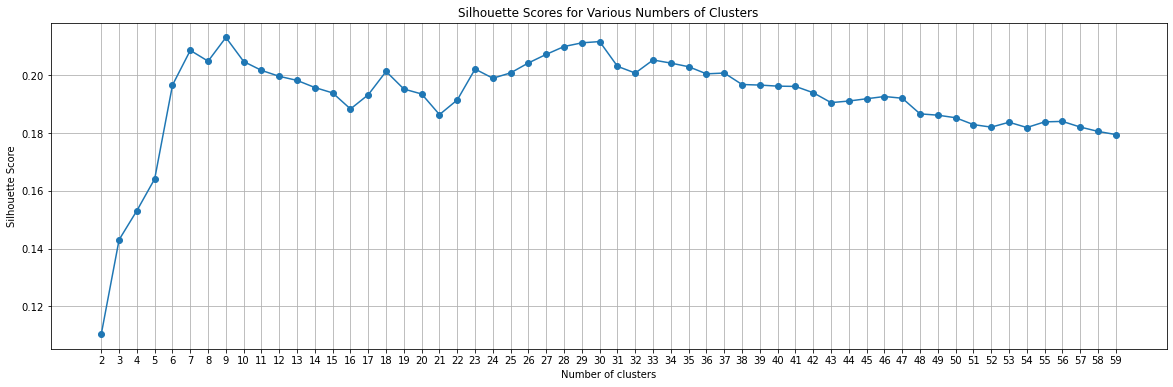

In [11]:
# Evaluate the optimal number of clusters using silhouette score
silhouette_scores = []
range_n_clusters = range(2, 60)

for n_clusters in range_n_clusters:
    clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='average')
    cluster_labels = clustering.fit_predict(data_1_standardized_transposed)
    
    silhouette_avg = silhouette_score(data_1_standardized_transposed, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

# Plot silhouette scores
plt.figure(figsize=(20, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Various Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

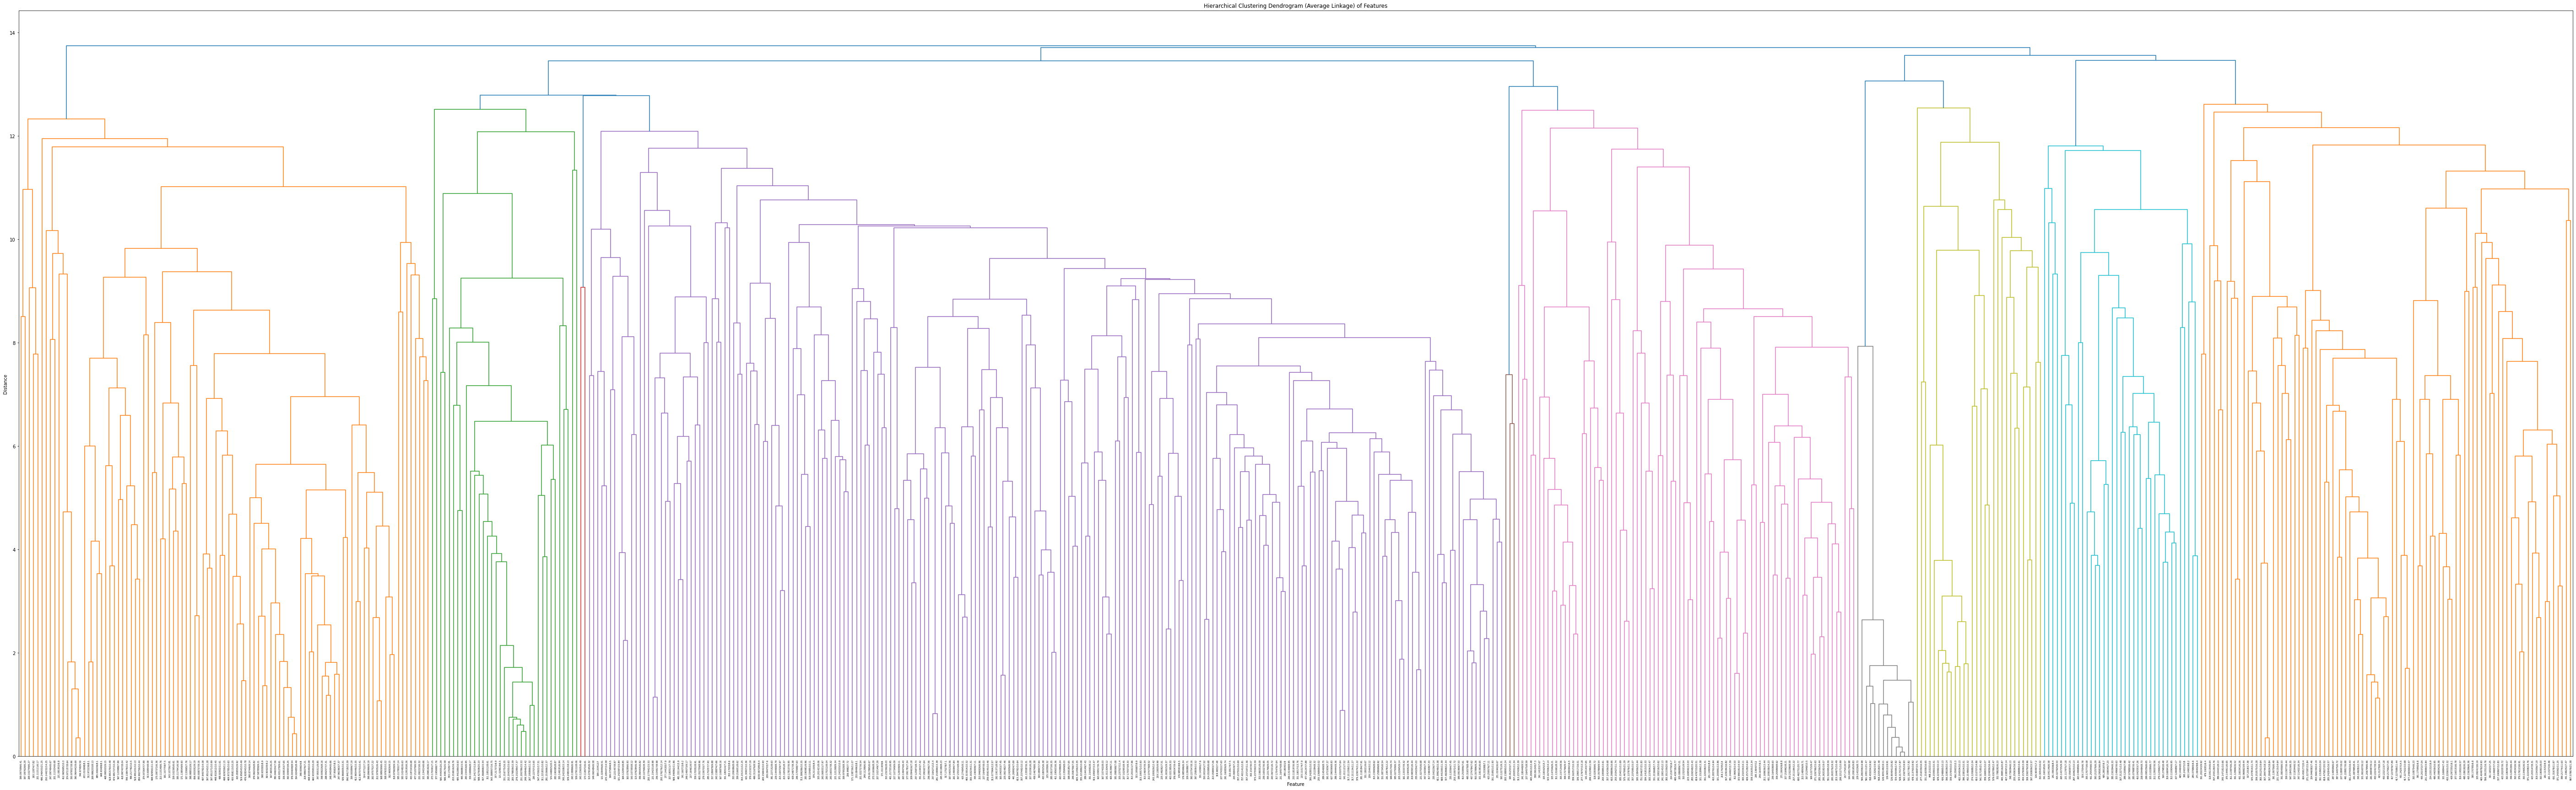

<Figure size 432x288 with 0 Axes>

Dendrogram with 9 clusters plotted and feature clusters saved to 'feature_clusters.xlsx'.


In [12]:
# Perform hierarchical clustering using average linkage and Euclidean distance
linked = linkage(data_1_standardized_transposed, method='average', metric='euclidean')

# Plot the dendrogram with column labels
plt.figure(figsize=(100, 30))
dendrogram(linked,
           labels=dat_cls.columns[1:],  # Exclude the target column header
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True,
           color_threshold=linked[-9, 2])  # Color threshold for 16 clusters

plt.title('Hierarchical Clustering Dendrogram (Average Linkage) of Features')
plt.xlabel('Feature')
plt.ylabel('Distance')
plt.xticks(rotation=90)
plt.show()

# Save the figure to a JPG file
plt.savefig('Z-SCORE-Histogram-FULL-Cluster-AVG-EUC.png', dpi=1500, bbox_inches='tight')
plt.show()

# Extract cluster labels for each feature using the fcluster function
cluster_labels = fcluster(linked, t=9, criterion='maxclust')

# Create a DataFrame to store features and their corresponding cluster labels
features_clusters = pd.DataFrame({
    'Feature': dat_cls.columns[1:],  # Exclude the target column header
    'Cluster': cluster_labels
})

# Create an Excel writer object
writer = pd.ExcelWriter('feature_clusters_Z-SCORE_9clus-avg-euc.xlsx', engine='xlsxwriter')

# Write each cluster's features to a separate sheet in the Excel file
for cluster_num in range(1, 10):
    cluster_features = features_clusters[features_clusters['Cluster'] == cluster_num]
    cluster_features.to_excel(writer, sheet_name=f'Cluster_{cluster_num}', index=False)

# Save the Excel file
writer.save()

print("Dendrogram with 9 clusters plotted and feature clusters saved to 'feature_clusters.xlsx'.")

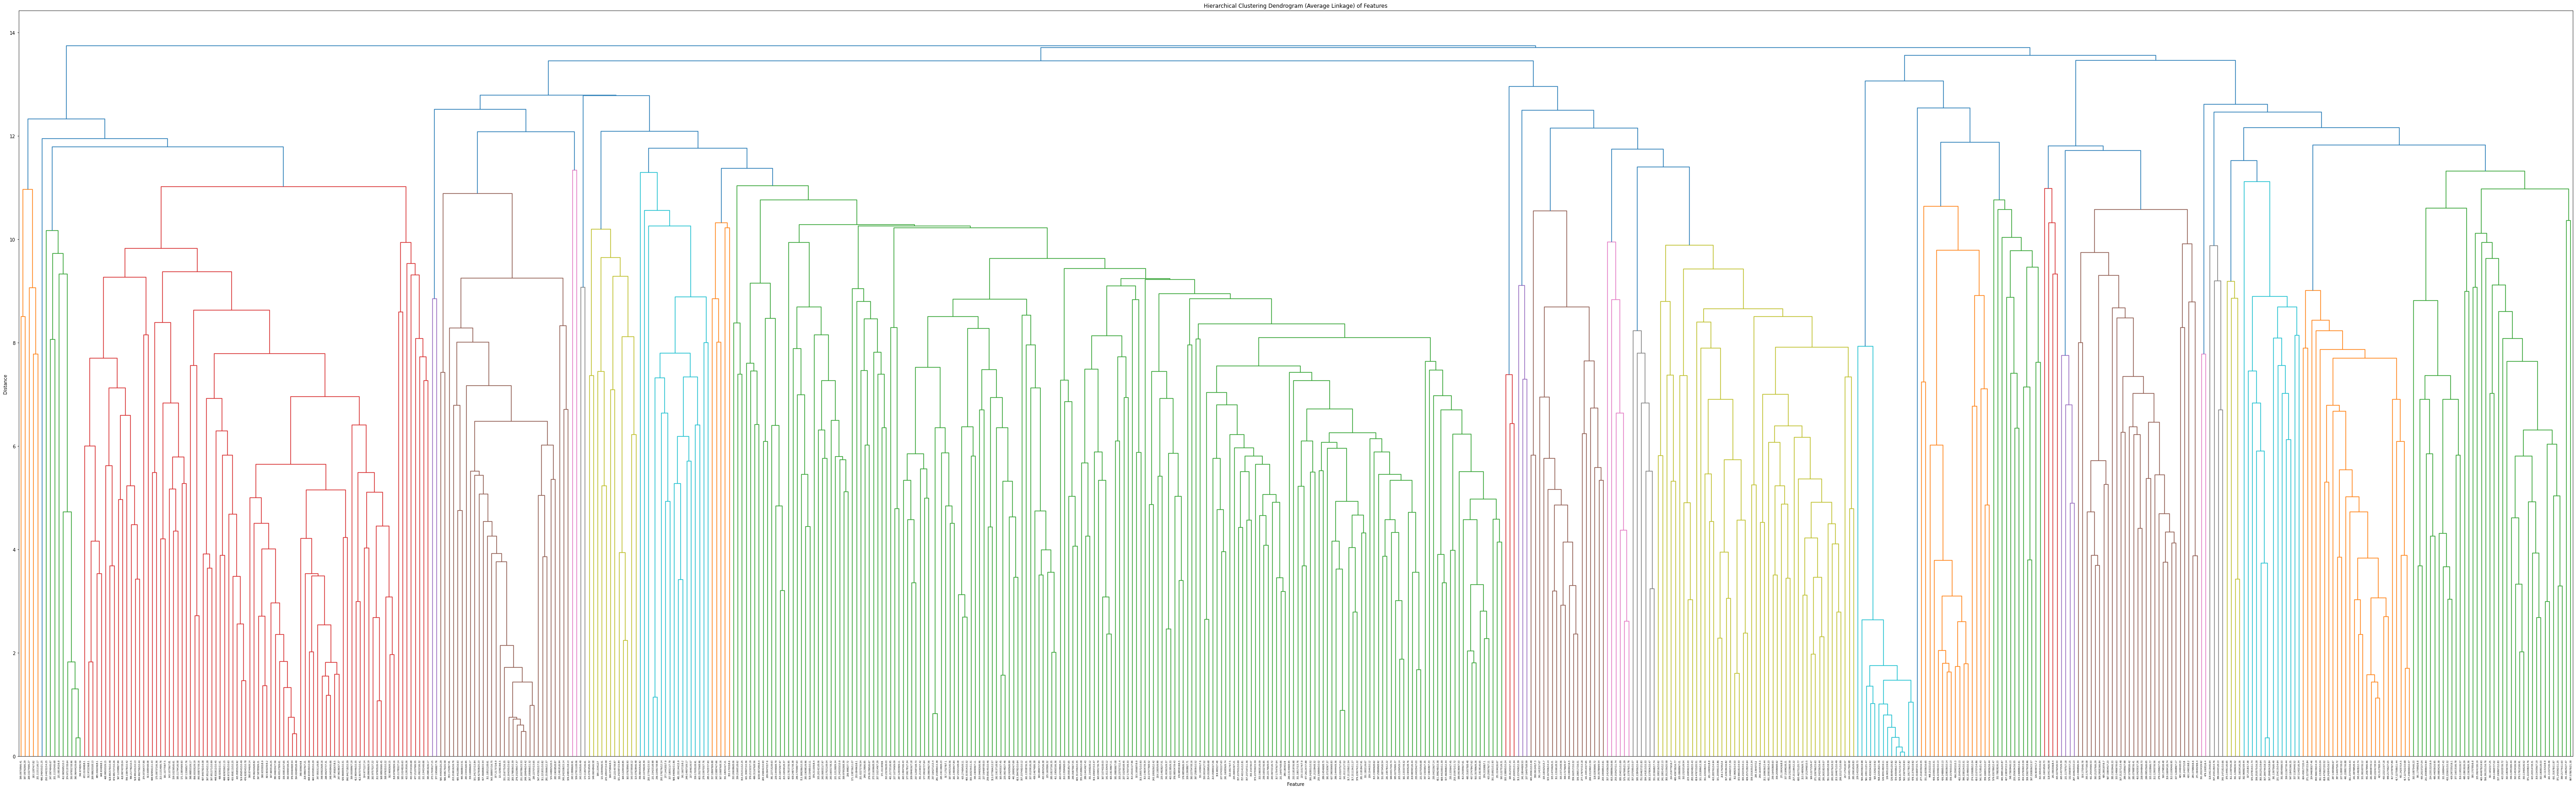

<Figure size 432x288 with 0 Axes>

Dendrogram with 30 clusters plotted and feature clusters saved to 'feature_clusters.xlsx'.


In [13]:
# Perform hierarchical clustering using average linkage and Euclidean distance
linked = linkage(data_1_standardized_transposed, method='average', metric='euclidean')

# Plot the dendrogram with column labels
plt.figure(figsize=(100, 30))
dendrogram(linked,
           labels=dat_cls.columns[1:],  # Exclude the target column header
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True,
           color_threshold=linked[-30, 2])  # Color threshold for 16 clusters

plt.title('Hierarchical Clustering Dendrogram (Average Linkage) of Features')
plt.xlabel('Feature')
plt.ylabel('Distance')
plt.xticks(rotation=90)
plt.show()

# Save the figure to a JPG file
plt.savefig('Z-SCORE-Histogram-FULL-Cluster-30-avg-euc.png', dpi=1500, bbox_inches='tight')
plt.show()

# Extract cluster labels for each feature using the fcluster function
cluster_labels = fcluster(linked, t=30, criterion='maxclust')

# Create a DataFrame to store features and their corresponding cluster labels
features_clusters = pd.DataFrame({
    'Feature': dat_cls.columns[1:],  # Exclude the target column header
    'Cluster': cluster_labels
})

# Create an Excel writer object
writer = pd.ExcelWriter('feature_clusters_-Z-SCORE_30clus-avg-euc.xlsx', engine='xlsxwriter')

# Write each cluster's features to a separate sheet in the Excel file
for cluster_num in range(1, 31):
    cluster_features = features_clusters[features_clusters['Cluster'] == cluster_num]
    cluster_features.to_excel(writer, sheet_name=f'Cluster_{cluster_num}', index=False)

# Save the Excel file
writer.save()

print("Dendrogram with 30 clusters plotted and feature clusters saved to 'feature_clusters.xlsx'.")

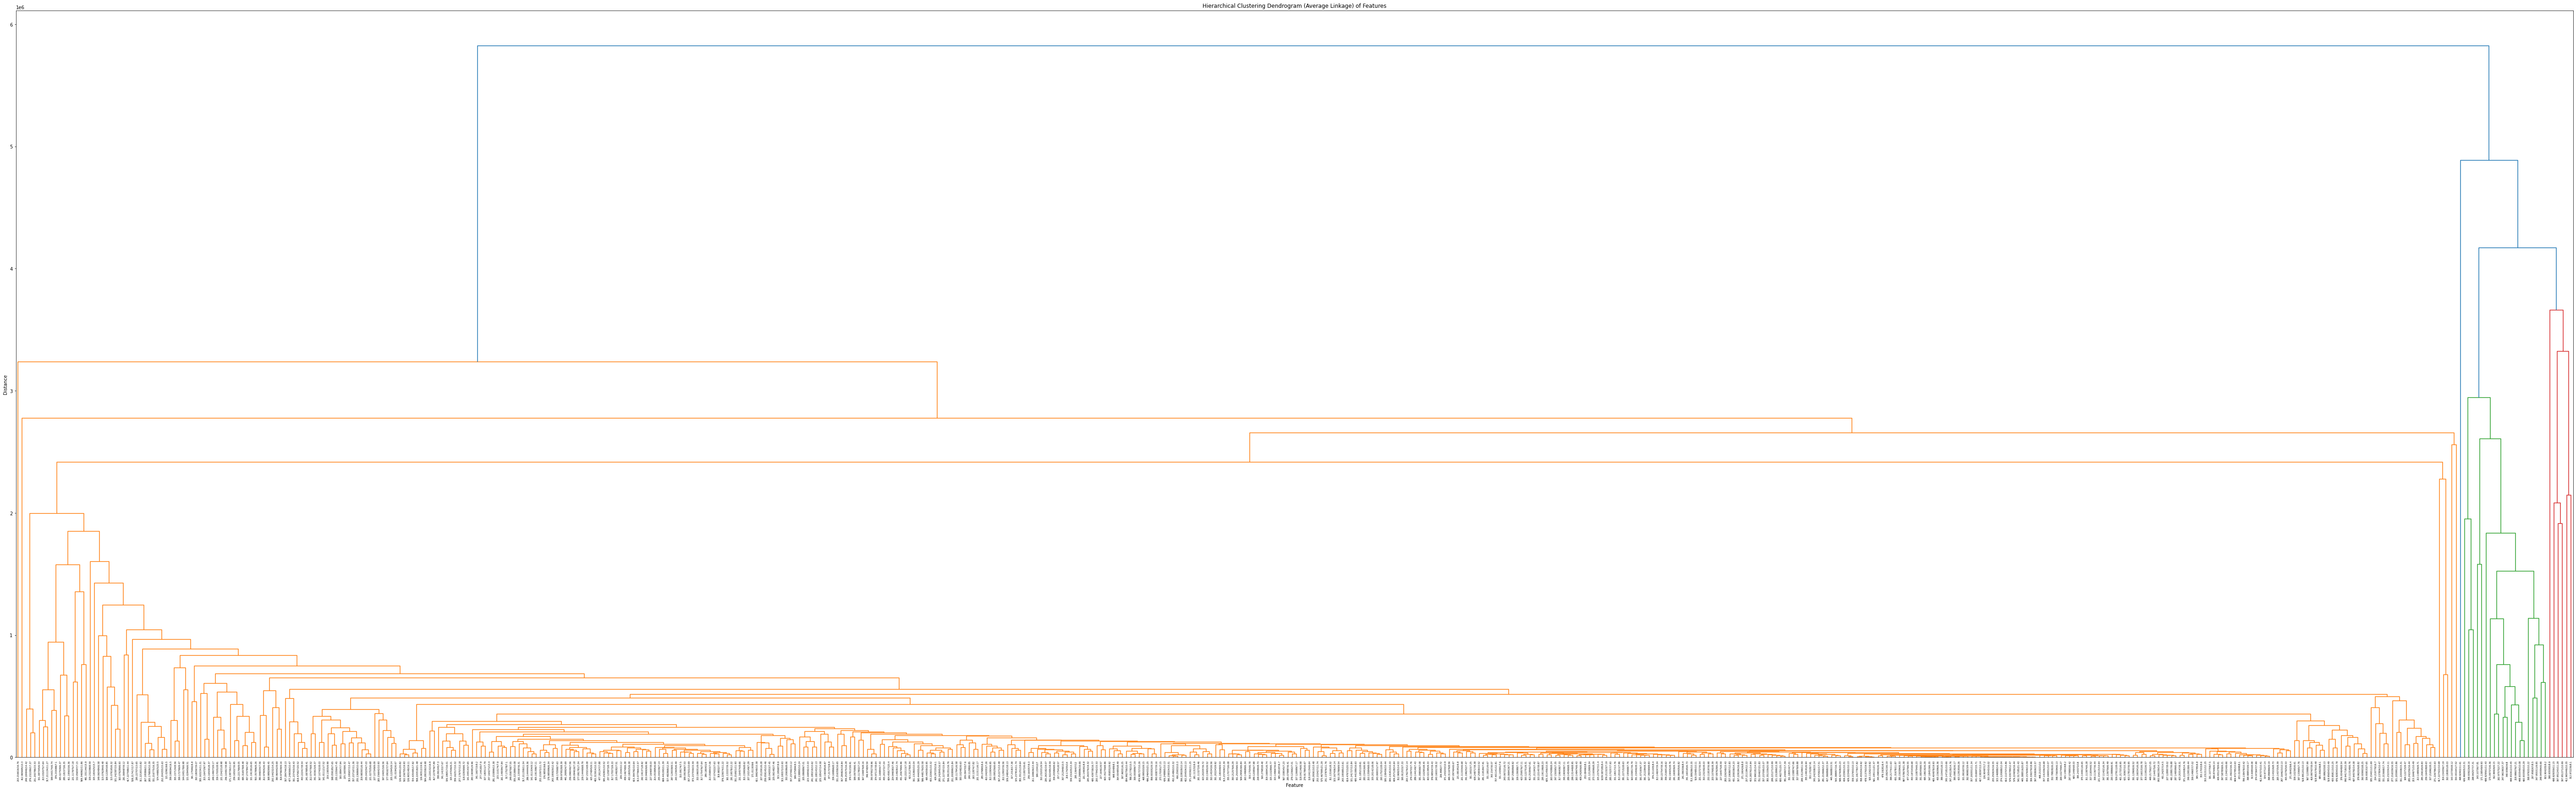

In [22]:
##Run same code with raw data:
#Import dataset for HCA --> raw values
dat_cls = pd.read_csv(r'240617-NTA-Norm-Paper2-HCA-Input-RAW.csv', header=0) #Non-targets: 92 samples X 602 features
#Convert to numpy
dat_cls_np = dat_cls.to_numpy()
target_1 = dat_cls_np[:,0] #Convert target variables to 2D-array for sci-kit learn
data_1 = dat_cls_np[:,1:]

# Transpose the data to cluster features instead of samples
data_1_standardized_transposed = data_1.T

# Perform hierarchical clustering using average linkage and Euclidean distance
linked = linkage(data_1_standardized_transposed, method='complete', metric='euclidean')

# Plot the dendrogram with column labels
plt.figure(figsize=(100, 30))
dendrogram(linked,
           labels=dat_cls.columns[1:],  # Exclude the target column header
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True)

plt.title('Hierarchical Clustering Dendrogram (Average Linkage) of Features')
plt.xlabel('Feature')
plt.ylabel('Distance')
plt.xticks(rotation=90)
plt.show()


For n_clusters = 2, the average silhouette_score is : 0.8993914900465734
For n_clusters = 3, the average silhouette_score is : 0.893366822277849
For n_clusters = 4, the average silhouette_score is : 0.8908461964074932
For n_clusters = 5, the average silhouette_score is : 0.8845974040116448
For n_clusters = 6, the average silhouette_score is : 0.8598249339865464
For n_clusters = 7, the average silhouette_score is : 0.8578230949382311
For n_clusters = 8, the average silhouette_score is : 0.857733754227317
For n_clusters = 9, the average silhouette_score is : 0.8566301593713083
For n_clusters = 10, the average silhouette_score is : 0.8369782518554666
For n_clusters = 11, the average silhouette_score is : 0.8363463657967145
For n_clusters = 12, the average silhouette_score is : 0.8293708852326427
For n_clusters = 13, the average silhouette_score is : 0.825567841269081
For n_clusters = 14, the average silhouette_score is : 0.8202524076016803
For n_clusters = 15, the average silhouette_score

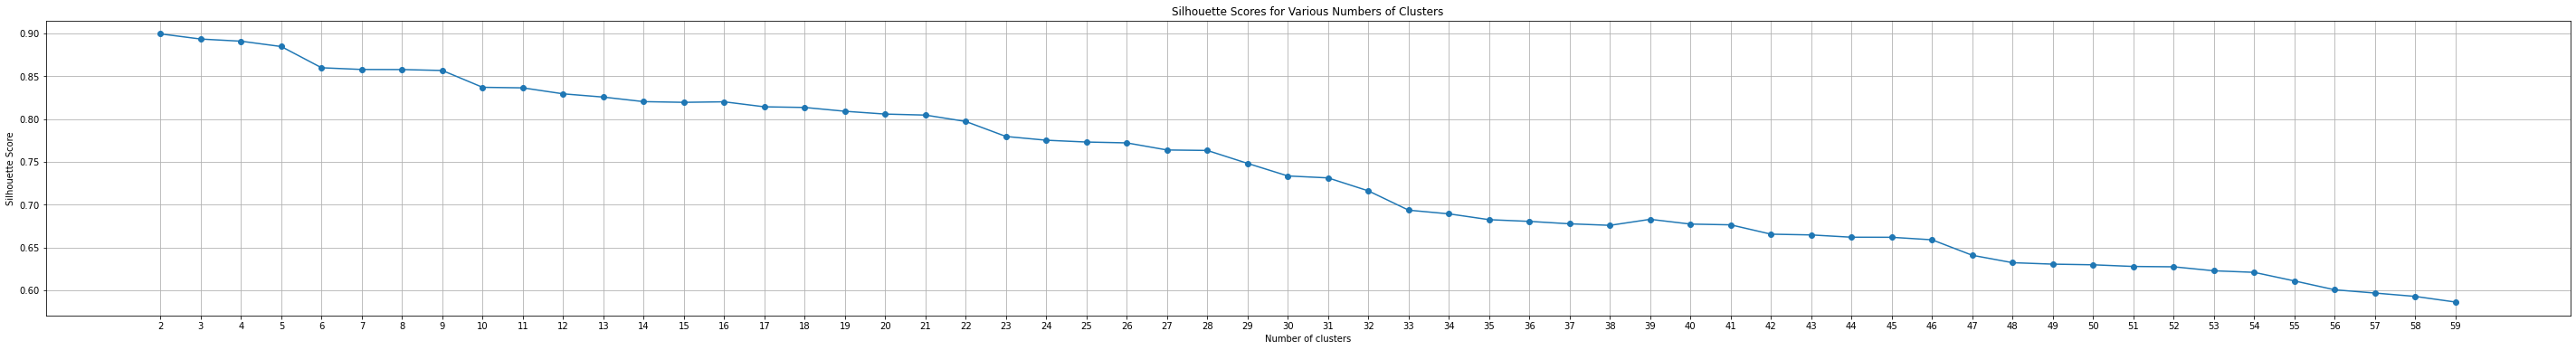

In [25]:
# Evaluate the optimal number of clusters using silhouette score
silhouette_scores = []
range_n_clusters = range(2, 60)

for n_clusters in range_n_clusters:
    clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='average')
    cluster_labels = clustering.fit_predict(data_1_standardized_transposed)
    
    silhouette_avg = silhouette_score(data_1_standardized_transposed, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

# Plot silhouette scores
plt.figure(figsize=(50, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Various Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

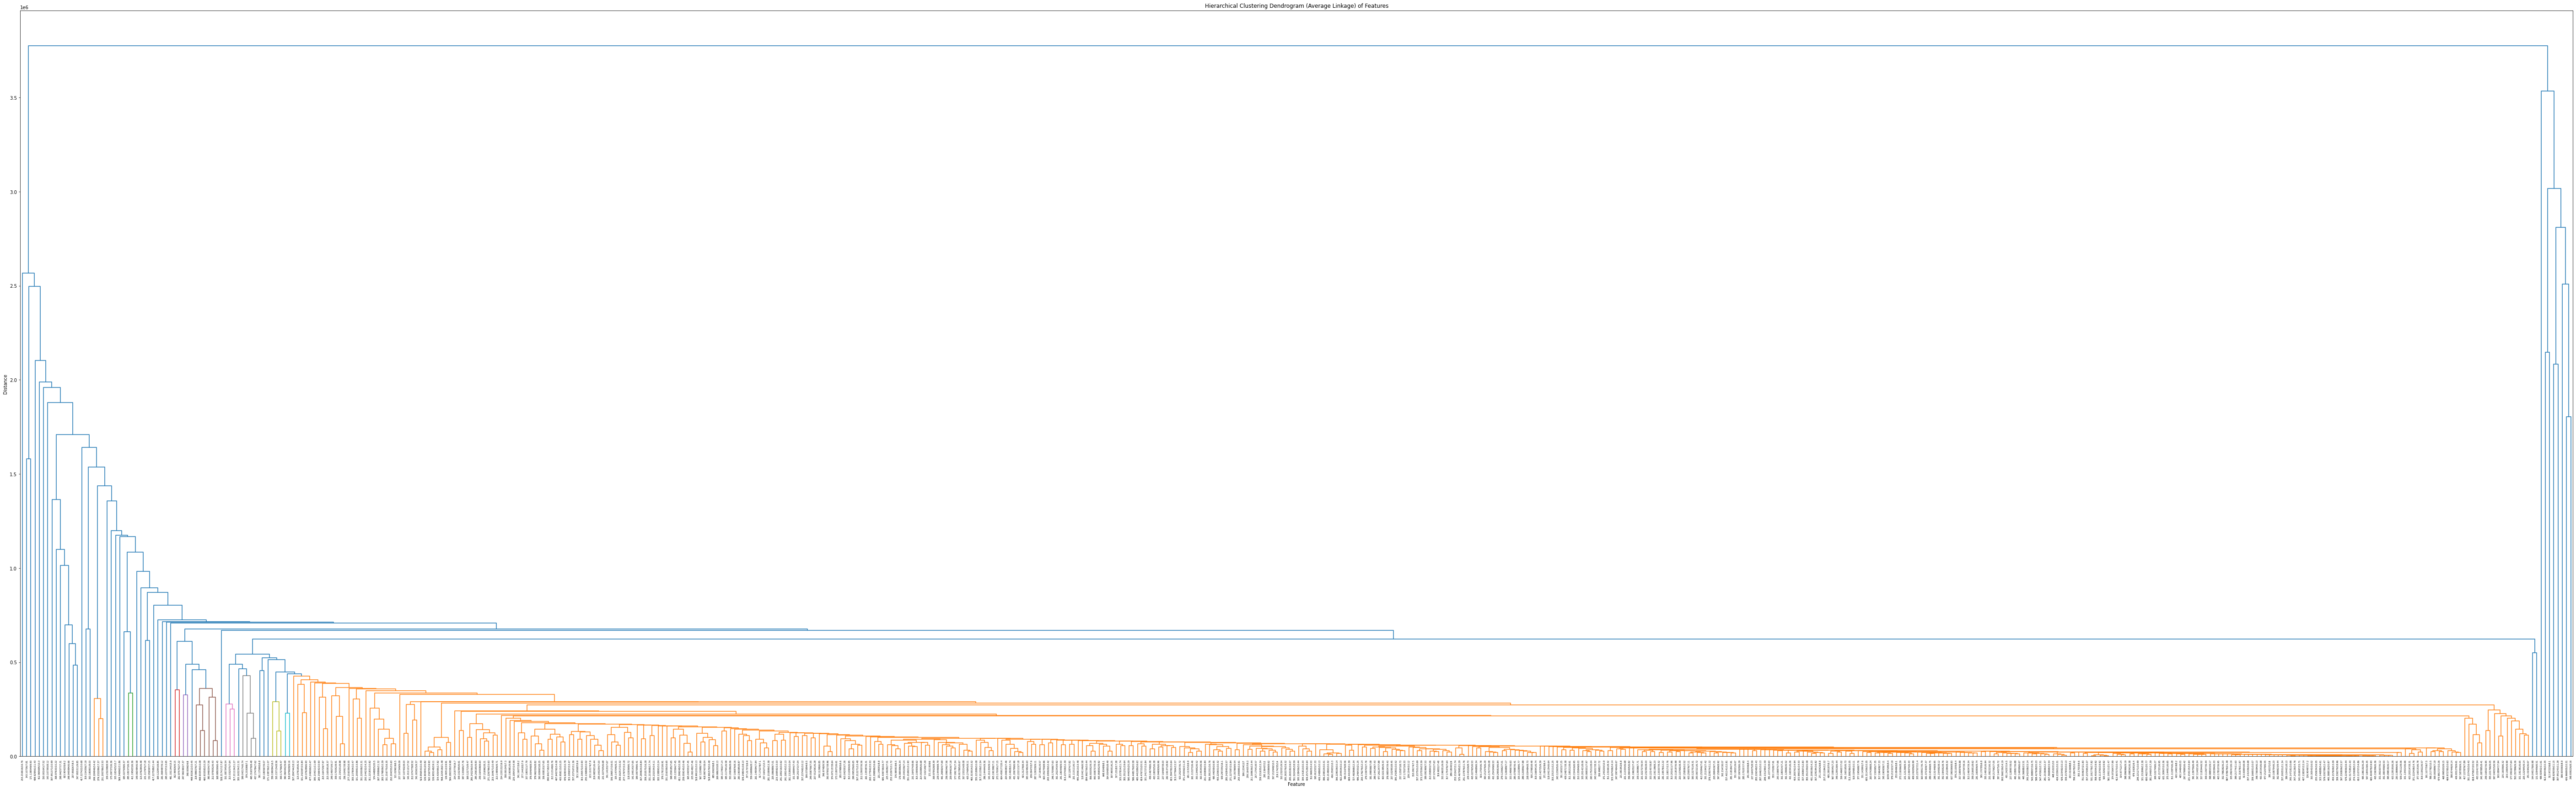

<Figure size 432x288 with 0 Axes>

Dendrogram with 56 clusters plotted and feature clusters saved to 'feature_clusters.xlsx'.


In [26]:
# Perform hierarchical clustering using average linkage and Euclidean distance
linked = linkage(data_1_standardized_transposed, method='average', metric='euclidean')

# Plot the dendrogram with column labels
plt.figure(figsize=(100, 30))
dendrogram(linked,
           labels=dat_cls.columns[1:],  # Exclude the target column header
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True,
           color_threshold=linked[-56, 2])  # Color threshold for 16 clusters

plt.title('Hierarchical Clustering Dendrogram (Average Linkage) of Features')
plt.xlabel('Feature')
plt.ylabel('Distance')
plt.xticks(rotation=90)
plt.show()

# Save the figure to a JPG file
plt.savefig('Histogram-FULL-Cluster-56-RAW-AVG-EUC.png', dpi=1500, bbox_inches='tight')
plt.show()

# Extract cluster labels for each feature using the fcluster function
cluster_labels = fcluster(linked, t=56, criterion='maxclust')

# Create a DataFrame to store features and their corresponding cluster labels
features_clusters = pd.DataFrame({
    'Feature': dat_cls.columns[1:],  # Exclude the target column header
    'Cluster': cluster_labels
})

# Create an Excel writer object
writer = pd.ExcelWriter('240617-feature_clusters-56-RAW-AVG-EUC.xlsx', engine='xlsxwriter')

# Write each cluster's features to a separate sheet in the Excel file
for cluster_num in range(1, 57):
    cluster_features = features_clusters[features_clusters['Cluster'] == cluster_num]
    cluster_features.to_excel(writer, sheet_name=f'Cluster_{cluster_num}', index=False)

# Save the Excel file
writer.save()

print("Dendrogram with 56 clusters plotted and feature clusters saved to 'feature_clusters.xlsx'.")

In [17]:
print(dat_cls.columns[1:])

Index(['498.92902/11.61', '426.966905/10.31', '398.935583/8.9',
       '412.965446/10.35', '348.939226/8.16', '143.10736/7.81',
       '498.929359/11.15', '498.929561/11.43', '412.965695/10.3',
       '298.942577/7.31',
       ...
       '353.30543/16.02', '274.120688/12.04', '579.224656/16.44',
       '434.157609/13.09', '541.517185/21.43', '610.110707/14.86',
       '445.388516/20.87', '369.336379/18.96', '579.030789/12.47',
       '397.330809/15.57'],
      dtype='object', length=602)


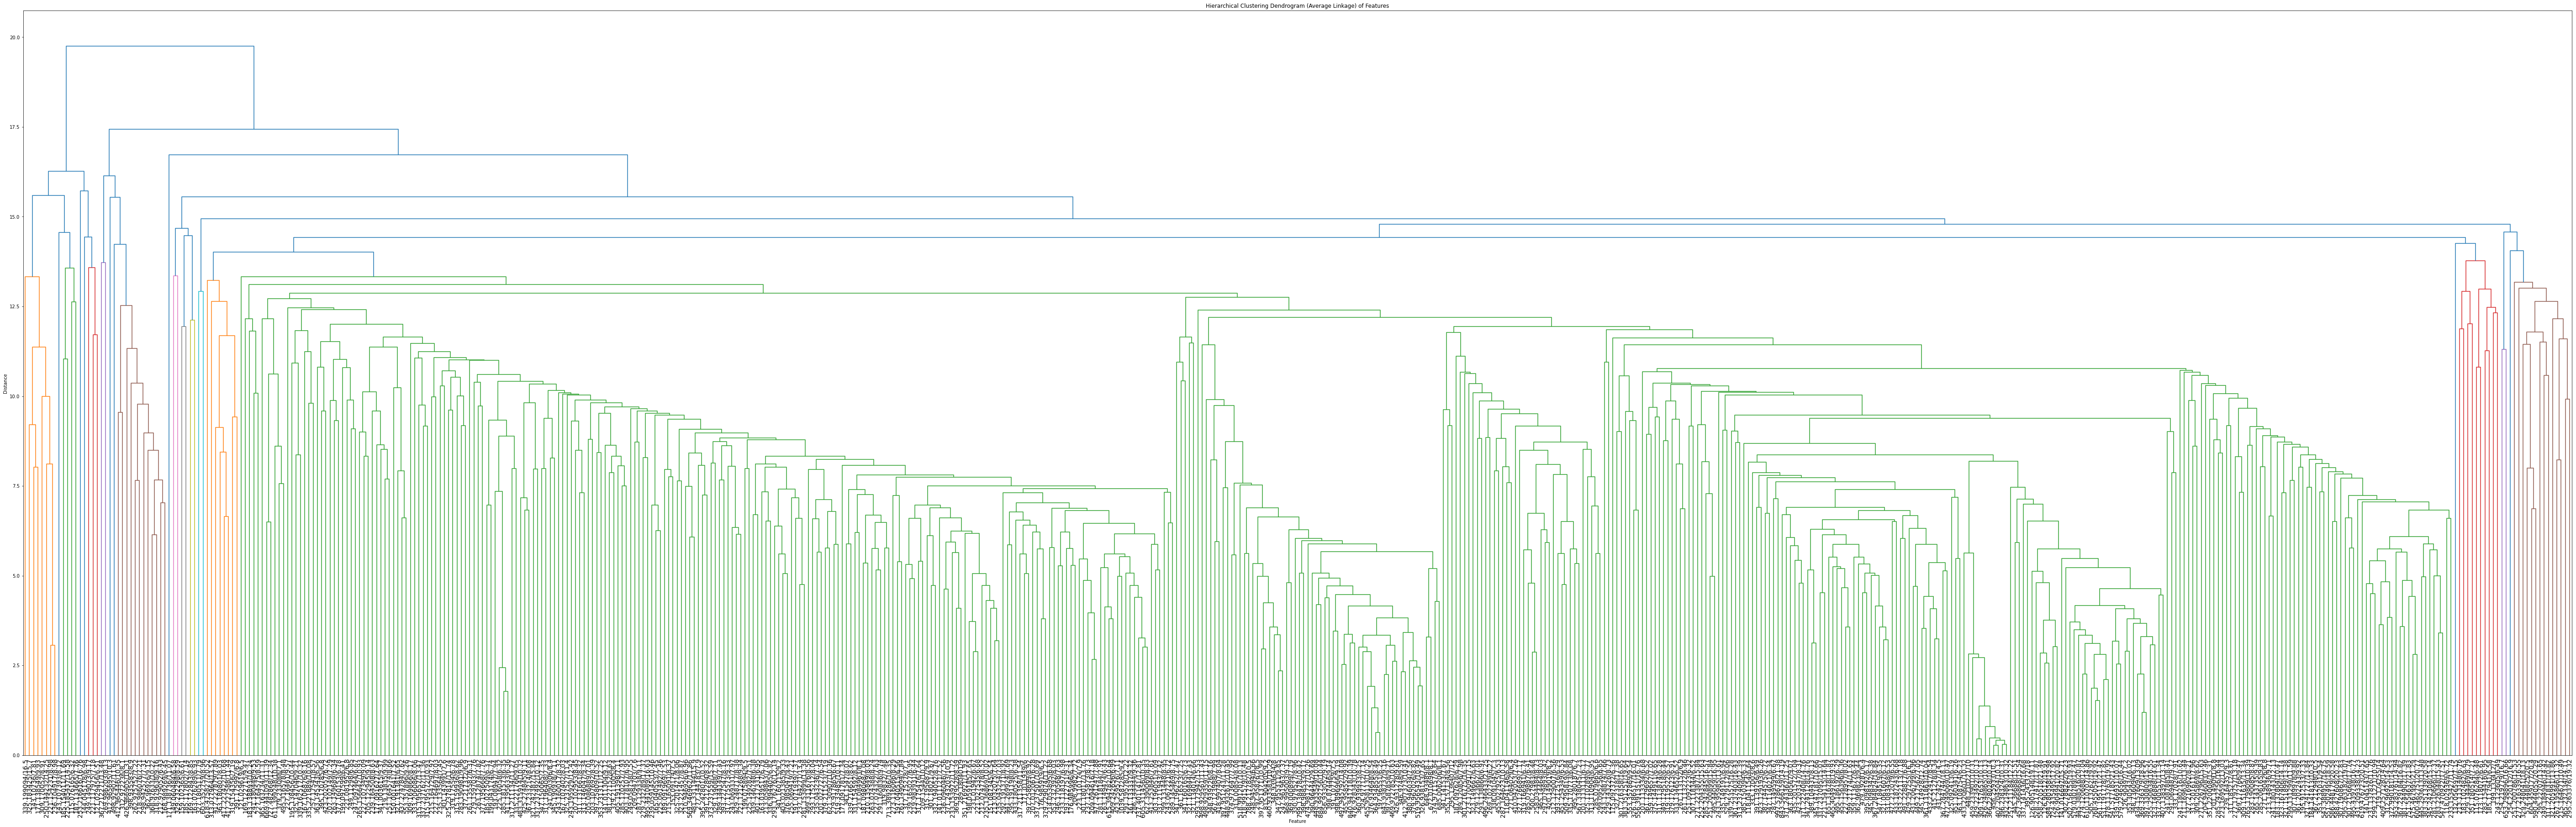

In [18]:
#Run with log-transformed data
#Import dataset for HCA --> raw values
dat_cls = pd.read_csv(r'240617-NTA-Paper2-HCA-Input-LOGT.csv', header=0) #Non-targets: 92 samples X 602 features
#Convert to numpy
dat_cls_np = dat_cls.to_numpy()
target_1 = dat_cls_np[:,0] #Convert target variables to 2D-array for sci-kit learn
data_1 = dat_cls_np[:,1:]

# Transpose the data to cluster features instead of samples
data_1_standardized_transposed = data_1.T

# Perform hierarchical clustering using average linkage and Euclidean distance
linked = linkage(data_1_standardized_transposed, method='average', metric='euclidean')

# Plot the dendrogram with column labels
plt.figure(figsize=(100, 30))
dendrogram(linked,
           labels=dat_cls.columns[1:],  # Exclude the target column header
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True)

plt.title('Hierarchical Clustering Dendrogram (Average Linkage) of Features')
plt.xlabel('Feature')
plt.ylabel('Distance')
plt.xticks(rotation=90, fontsize = 14)
plt.show()


For n_clusters = 2, the average silhouette_score is : 0.3592544344640873
For n_clusters = 3, the average silhouette_score is : 0.28637957108358214
For n_clusters = 4, the average silhouette_score is : 0.23827144163999492
For n_clusters = 5, the average silhouette_score is : 0.23522146176902833
For n_clusters = 6, the average silhouette_score is : 0.19881545386871827
For n_clusters = 7, the average silhouette_score is : 0.19624299956016966
For n_clusters = 8, the average silhouette_score is : 0.1957931639177983
For n_clusters = 9, the average silhouette_score is : 0.18253310982378995
For n_clusters = 10, the average silhouette_score is : 0.1778437651368664
For n_clusters = 11, the average silhouette_score is : 0.15251379203766077
For n_clusters = 12, the average silhouette_score is : 0.13035262210636717
For n_clusters = 13, the average silhouette_score is : 0.12957944649405753
For n_clusters = 14, the average silhouette_score is : 0.12423335620365994
For n_clusters = 15, the average sil

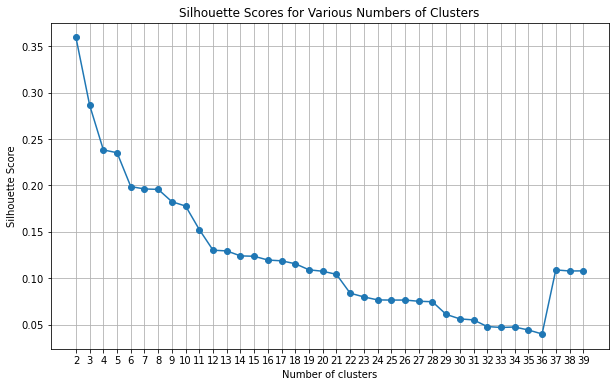

In [19]:
# Evaluate the optimal number of clusters using silhouette score
silhouette_scores = []
range_n_clusters = range(2, 40)

for n_clusters in range_n_clusters:
    clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='average')
    cluster_labels = clustering.fit_predict(data_1_standardized_transposed)
    
    silhouette_avg = silhouette_score(data_1_standardized_transposed, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Various Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

In [27]:
#Assigning cluster number to each feature of main dataset

# Load the CSV file
csv_file_path = '240617-NTA-Noramlized-FILTERED-DATASET-Cluster.csv'
dataset_df = pd.read_csv(csv_file_path)

# Load the Excel workbook
excel_file_path = 'feature_clusters_Z-SCORE_54clus_COMPLETE_EUC.xlsx'
excel_workbook = pd.ExcelFile(excel_file_path)

# Initialize a dictionary to store feature names and their corresponding cluster numbers
feature_clusters = {}

# Iterate over all the sheets (tabs) in the Excel workbook
for sheet_name in excel_workbook.sheet_names:
    sheet_df = pd.read_excel(excel_file_path, sheet_name=sheet_name)
    for _, row in sheet_df.iterrows():
        feature_name = row[0]
        cluster_number = row[1]
        feature_clusters[feature_name] = cluster_number

# Add a new column to the dataset DataFrame with the cluster number for each feature
dataset_df['Cluster_Number'] = dataset_df.iloc[:, 0].map(feature_clusters)

# Save the updated dataset to a new CSV file
output_csv_file_path = 'Updated_240617-NTA-Noramlized-FILTERED-DATASET-Cluster-COM-EUC-54CLUS.csv'
dataset_df.to_csv(output_csv_file_path, index=False)

print("The CSV file has been updated with cluster numbers and saved as 'Updated_240617-NTA-Noramlized-FILTERED-DATASET-Cluster-COM-EUC-54CLUS.csv'.")

The CSV file has been updated with cluster numbers and saved as 'Updated_240617-NTA-Noramlized-FILTERED-DATASET-Cluster-COM-EUC-54CLUS.csv'.


In [28]:
#Assigning cluster number to each feature of main dataset

# Load the CSV file
csv_file_path = '240617-NTA-Noramlized-FILTERED-DATASET-Cluster.csv'
dataset_df = pd.read_csv(csv_file_path)

# Load the Excel workbook
excel_file_path = 'feature_clusters_-Z-SCORE_30clus-avg-euc.xlsx'
excel_workbook = pd.ExcelFile(excel_file_path)

# Initialize a dictionary to store feature names and their corresponding cluster numbers
feature_clusters = {}

# Iterate over all the sheets (tabs) in the Excel workbook
for sheet_name in excel_workbook.sheet_names:
    sheet_df = pd.read_excel(excel_file_path, sheet_name=sheet_name)
    for _, row in sheet_df.iterrows():
        feature_name = row[0]
        cluster_number = row[1]
        feature_clusters[feature_name] = cluster_number

# Add a new column to the dataset DataFrame with the cluster number for each feature
dataset_df['Cluster_Number'] = dataset_df.iloc[:, 0].map(feature_clusters)

# Save the updated dataset to a new CSV file
output_csv_file_path = 'Updated_240617-NTA-Noramlized-FILTERED-DATASET-Cluster-AVG-EUC-30CLUS.csv'
dataset_df.to_csv(output_csv_file_path, index=False)

print("The CSV file has been updated with cluster numbers and saved as 'Updated_240617-NTA-Noramlized-FILTERED-DATASET-Cluster-AVG-EUC-30CLUS.csv'.")

The CSV file has been updated with cluster numbers and saved as 'Updated_240617-NTA-Noramlized-FILTERED-DATASET-Cluster-AVG-EUC-30CLUS.csv'.


In [37]:
##Now rewriting the representative features to another excel file (+ also closest feature)
# Load the dataset
file_path = 'Updated_240617-NTA-Noramlized-FILTERED-DATASET-Cluster-COM-EUC-54CLUS.csv'
data_df = pd.read_csv(file_path)

# Extract the necessary columns
features = data_df.iloc[:, 0]  # Feature names
secondary_labels = data_df.iloc[:, 1]  # Secondary labels
feature_values = data_df.iloc[:, 2:-1]  # Feature values across 92 samples
cluster_numbers = data_df['Cluster_Number']  # Cluster numbers

# Initialize a DataFrame to store the representative features of each cluster
representative_features = pd.DataFrame()

# Calculate the centroid (mean vector) for each cluster
for cluster_num in range(1, 55):
    # Get the indices of the features in the current cluster
    cluster_indices = cluster_numbers[cluster_numbers == cluster_num].index
    
    # Extract the feature values for the current cluster
    cluster_data = feature_values.iloc[cluster_indices]
    
    # Calculate the centroid (mean vector) for the current cluster
    cluster_centroid = cluster_data.mean(axis=0)
    
    # Create a new row for the representative feature
    representative_feature = pd.DataFrame([[f'Cluster_{cluster_num}_centroid', 'Centroid'] + list(cluster_centroid)], 
                                          columns=['Feature', 'Secondary_Label'] + list(feature_values.columns))
    
    # Append the representative feature to the DataFrame
    representative_features = pd.concat([representative_features, representative_feature], ignore_index=True)

# Save the representative features to an Excel file
output_excel_file_path = 'representative_features_centroids.xlsx'
representative_features.to_excel(output_excel_file_path, index=False)

print("The representative features for each cluster have been saved to 'representative_features_centroids.xlsx'.")

The representative features for each cluster have been saved to 'representative_features_centroids.xlsx'.


In [38]:
# Load the dataset
file_path = 'Updated_240617-NTA-Noramlized-FILTERED-DATASET-Cluster-COM-EUC-54CLUS.csv'
data_df = pd.read_csv(file_path)

# Extract the necessary columns
features = data_df.iloc[:, 0]  # Feature names
secondary_labels = data_df.iloc[:, 1]  # Secondary labels
feature_values = data_df.iloc[:, 2:-1]  # Feature values across 92 samples
cluster_numbers = data_df['Cluster_Number']  # Cluster numbers

# Initialize DataFrames to store the representative features of each cluster and the closest features
representative_features = pd.DataFrame()
closest_features_df = pd.DataFrame()

# Calculate the centroid (mean vector) for each cluster and find the closest feature
for cluster_num in range(1, 55):
    # Get the indices of the features in the current cluster
    cluster_indices = cluster_numbers[cluster_numbers == cluster_num].index
    
    # Extract the feature values for the current cluster
    cluster_data = feature_values.iloc[cluster_indices]
    
    # Calculate the centroid (mean vector) for the current cluster
    cluster_centroid = cluster_data.mean(axis=0)
    
    # Create a new row for the representative feature
    representative_feature = pd.DataFrame([[f'Cluster_{cluster_num}_centroid', 'Centroid'] + list(cluster_centroid)], 
                                          columns=['Feature', 'Secondary_Label'] + list(feature_values.columns))
    
    # Append the representative feature to the DataFrame
    representative_features = pd.concat([representative_features, representative_feature], ignore_index=True)
    
    # Calculate the distances between the centroid and each feature in the cluster
    distances = cdist(cluster_data.values, cluster_centroid.values.reshape(1, -1), 'euclidean')
    
    # Find the index of the feature with the minimum distance to the centroid
    closest_feature_idx = np.argmin(distances)
    
    # Get the closest feature name and its associated values
    closest_feature = features.iloc[cluster_indices].iloc[closest_feature_idx]
    closest_feature_secondary_label = secondary_labels.iloc[cluster_indices].iloc[closest_feature_idx]
    closest_feature_values = feature_values.iloc[cluster_indices].iloc[closest_feature_idx]
    
    # Create a new row for the closest feature
    closest_feature_row = pd.DataFrame([[closest_feature, closest_feature_secondary_label] + list(closest_feature_values)], 
                                       columns=['Feature', 'Secondary_Label'] + list(feature_values.columns))
    
    # Append the closest feature to the DataFrame
    closest_features_df = pd.concat([closest_features_df, closest_feature_row], ignore_index=True)

# Save the representative features to an Excel file
output_excel_file_path = 'representative_features_centroids-trial2.xlsx'
representative_features.to_excel(output_excel_file_path, index=False)

# Save the closest features to an Excel file
output_closest_excel_file_path = 'closest_features_to_centroids-trial2.xlsx'
closest_features_df.to_excel(output_closest_excel_file_path, index=False)

print("The representative features for each cluster have been saved to 'representative_features_centroids.xlsx'.")
print("The closest features to cluster centroids have been saved to 'closest_features_to_centroids.xlsx'.")

The representative features for each cluster have been saved to 'representative_features_centroids.xlsx'.
The closest features to cluster centroids have been saved to 'closest_features_to_centroids.xlsx'.


In [39]:
# Load the dataset
file_path = 'Updated_240617-NTA-Noramlized-FILTERED-DATASET-Cluster-AVG-EUC-30CLUS.csv'
data_df = pd.read_csv(file_path)

# Extract the necessary columns
features = data_df.iloc[:, 0]  # Feature names
secondary_labels = data_df.iloc[:, 1]  # Secondary labels
feature_values = data_df.iloc[:, 2:-1]  # Feature values across 92 samples
cluster_numbers = data_df['Cluster_Number']  # Cluster numbers

# Initialize DataFrames to store the representative features of each cluster and the closest features
representative_features = pd.DataFrame()
closest_features_df = pd.DataFrame()

# Calculate the centroid (mean vector) for each cluster and find the closest feature
for cluster_num in range(1, 31):
    # Get the indices of the features in the current cluster
    cluster_indices = cluster_numbers[cluster_numbers == cluster_num].index
    
    # Extract the feature values for the current cluster
    cluster_data = feature_values.iloc[cluster_indices]
    
    # Calculate the centroid (mean vector) for the current cluster
    cluster_centroid = cluster_data.mean(axis=0)
    
    # Create a new row for the representative feature
    representative_feature = pd.DataFrame([[f'Cluster_{cluster_num}_centroid', 'Centroid'] + list(cluster_centroid)], 
                                          columns=['Feature', 'Secondary_Label'] + list(feature_values.columns))
    
    # Append the representative feature to the DataFrame
    representative_features = pd.concat([representative_features, representative_feature], ignore_index=True)
    
    # Calculate the distances between the centroid and each feature in the cluster
    distances = cdist(cluster_data.values, cluster_centroid.values.reshape(1, -1), 'euclidean')
    
    # Find the index of the feature with the minimum distance to the centroid
    closest_feature_idx = np.argmin(distances)
    
    # Get the closest feature name and its associated values
    closest_feature = features.iloc[cluster_indices].iloc[closest_feature_idx]
    closest_feature_secondary_label = secondary_labels.iloc[cluster_indices].iloc[closest_feature_idx]
    closest_feature_values = feature_values.iloc[cluster_indices].iloc[closest_feature_idx]
    
    # Create a new row for the closest feature
    closest_feature_row = pd.DataFrame([[closest_feature, closest_feature_secondary_label] + list(closest_feature_values)], 
                                       columns=['Feature', 'Secondary_Label'] + list(feature_values.columns))
    
    # Append the closest feature to the DataFrame
    closest_features_df = pd.concat([closest_features_df, closest_feature_row], ignore_index=True)

# Save the representative features to an Excel file
output_excel_file_path = 'representative_features_centroids-AVG-EUC-30CLUS.xlsx'
representative_features.to_excel(output_excel_file_path, index=False)

# Save the closest features to an Excel file
output_closest_excel_file_path = 'closest_features_to_centroids-AVG-EUC-30CLUS.xlsx'
closest_features_df.to_excel(output_closest_excel_file_path, index=False)

print("The representative features for each cluster have been saved to 'representative_features_centroids.xlsx'.")
print("The closest features to cluster centroids have been saved to 'closest_features_to_centroids.xlsx'.")

The representative features for each cluster have been saved to 'representative_features_centroids.xlsx'.
The closest features to cluster centroids have been saved to 'closest_features_to_centroids.xlsx'.
